# Import Library yang Dibutuhkan

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Import Data dari kaggle.com

In [2]:
# Install kaggle
!pip install kaggle

# Import kaggle.json
from google.colab import files
files.upload()

# Membuat direktori kaggle dan copy file kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Mengganti permission/izin
!chmod 600 ~/.kaggle/kaggle.json

Saving youtube-trend-with-subscriber.zip to youtube-trend-with-subscriber.zip
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# Download dataset yang diinginkan dengan syarat dataset berasal dari kaggle.com
!kaggle datasets download -d sgonkaggle/youtube-trend-with-subscriber
!unzip youtube-trend-with-subscriber.zip # Unzip file
yt = pd.read_csv('USvideos_modified.csv') # Baca file
yt

Dataset URL: https://www.kaggle.com/datasets/sgonkaggle/youtube-trend-with-subscriber
License(s): GPL-2.0
youtube-trend-with-subscriber.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  youtube-trend-with-subscriber.zip
  inflating: USvideos_modified.csv   


video_id last_trending_date publish_date  publish_hour  category_id  \
0     2kyS6SvSYSE         2017-11-20   2017-11-13            17           22   
1     1ZAPwfrtAFY         2017-11-20   2017-11-13             7           24   
2     5qpjK5DgCt4         2017-11-20   2017-11-12            19           23   
3     puqaWrEC7tY         2017-11-20   2017-11-13            11           24   
4     d380meD0W0M         2017-11-19   2017-11-12            18           24   
...           ...                ...          ...           ...          ...   
4542  CvkOWb1U-LI         2018-03-05   2018-03-02            19           28   
4543  _CFJ1u-DIBc         2018-03-05   2018-03-02            19           28   
4544  Juad74hE6rs         2018-03-05   2018-03-01            16           26   
4545  n_S8d_1KVhU         2018-03-05   2018-03-01            18           20   
4546  Eouvsy8JdLU         2018-03-05   2018-02-27            16           24   

              channel_title    views   likes  dislikes  comment_count  ...  \
0              CaseyNeistat  2564903   96321      7972          22149  ...   
1           LastWeekTonight  6109402  151250     11508          19820  ...   
2              Rudy Mancuso  5315471  187303      7278           9990  ...   
3     Good Mythical Morning   913268   16729      1386           2988  ...   
4                  nigahiga  2819118  153395      2416          20573  ...   
...                     ...      ...     ...       ...            ...  ...   
4542            Techquickie   230223   10926       446            791  ...   
4543           Tech Insider   128591    2924       316            564  ...   
4544         Gemma Stafford    55076    3436        35            621  ...   
4545           Scott Manley    48505    2504        17            350  ...   
4546         The Action Lab   141285    4998       222            858  ...   

      tag_appeared_in_title  \
0                     False   
1                     False   
2                      True   
3                      True   
4                      True   
...                     ...   
4542                   True   
4543                   True   
4544                   True   
4545                   True   
4546                   True   

                                                  title  \
0                    WE WANT TO TALK ABOUT OUR MARRIAGE   
1     The Trump Presidency: Last Week Tonight with J...   
2     Racist Superman | Rudy Mancuso, King Bach & Le...   
3                      Nickelback Lyrics: Real or Fake?   
4                              I Dare You: GOING BALD!?   
...                                                 ...   
4542              Why Are Progress Bars Wrong So Often?   
4543                     Why Does Bluetooth Still Suck?   
4544  Crazy Frosting Recipe: The Best Buttercream Fr...   
4545  How Satellites Capture 400 Megapixel Images Of...   
4546  Is It Possible To Bend Light With Your Finger?...   

                                                   tags  \
0                                       SHANtell martin   
1     last week tonight trump presidency|last week t...   
2     racist superman|rudy|mancuso|king|bach|racist|...   
3     rhett and link|gmm|good mythical morning|rhett...   
4     ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...   
...                                                 ...   
4542  progress|bar|estimate|time|windows|inaccurate|...   
4543  Tech Insider|TI|Tech|Science|Innovation|Digita...   
4544  Frosting|Crazy Frosting|Buttercream Frosting|B...   
4545  himawari|goes-16|goes-r|goes-s|weather|meteoro...   
4546  light|bend|light bender|bender|finger|crazy|aw...   

                                            description trend_day_count  \
0     SHANTELL'S CHANNEL - https://www.youtube.com/s...               7   
1     One year after the presidential election, John...               7   
2     WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...               7   
3     Today we find 

# Data Cleansing

In [4]:
# Menghapus kolom yang bukan numerik
# Tujuan dari penghapusan ini hanyalah untuk mencari apakah ada data bernilai negatif atau tidak
yt_now = yt.drop(columns=['video_id', 'last_trending_date', 'publish_date', 'publish_hour', 'category_id', 'channel_title', 'comments_disabled',
                          'ratings_disabled', 'title', 'tag_appeared_in_title', 'tags', 'description'])

# Akan dicari apakah ada data bernilai negatif atau tidak
# Jika ada, maka outputnya adalah True. Jika tidak, maka False
(yt_now.values < 0).any()

False

In [5]:
# Cek apakah ada data kosong atau tidak
yt.isnull().sum()

video_id                         0
last_trending_date               0
publish_date                     0
publish_hour                     0
category_id                      0
channel_title                    0
views                            0
likes                            0
dislikes                         0
comment_count                    0
comments_disabled                0
ratings_disabled                 0
tag_appeared_in_title_count      0
tag_appeared_in_title            0
title                            0
tags                           208
description                     89
trend_day_count                  0
trend.publish.diff               0
trend_tag_highest                0
trend_tag_total                  0
tags_count                       0
subscriber                      22
dtype: int64

In [6]:
# Terlihat bahwa hanya terdapat satu kolom bertipe numerik, yaitu kolom 'subscriber'
# Karena tidak terdapat data aneh, ganti missing data (NaN) dengan nilai rata-rata pada kolom 'subscriber'
yt['subscriber'] = yt['subscriber'].fillna(yt['subscriber'].mean())

In [7]:
# Cek ulang apakah masih ada data kosong di kolom 'subscriber' atau tidak
yt['subscriber'].isnull().sum()

0

# Dimensi File

In [8]:
# Menghitung dimensi file
yt.shape

(4547, 23)

# Ukuran File

In [9]:
# Menghitung ukuran file
file_size = os.path.getsize('USvideos_modified.csv')
print('Ukuran file:', file_size, '')

Ukuran file: 6291178 


# Tipe Data
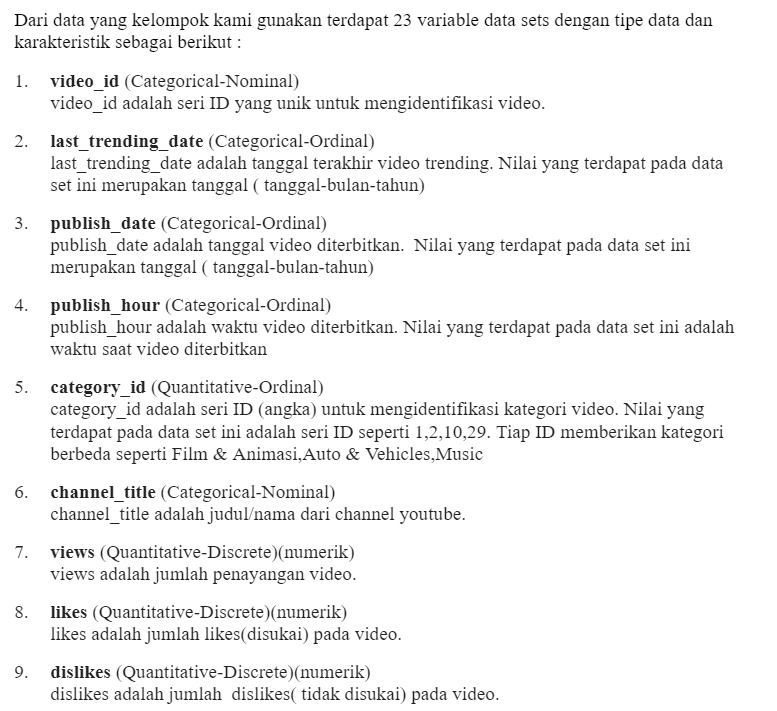

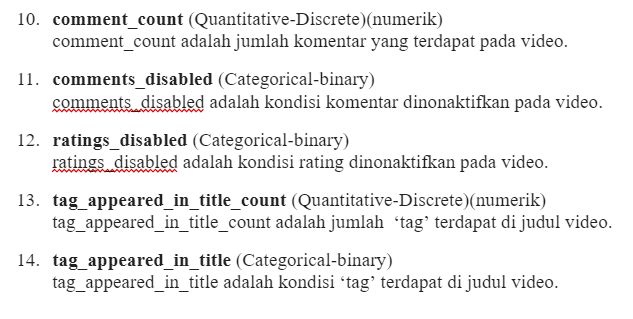

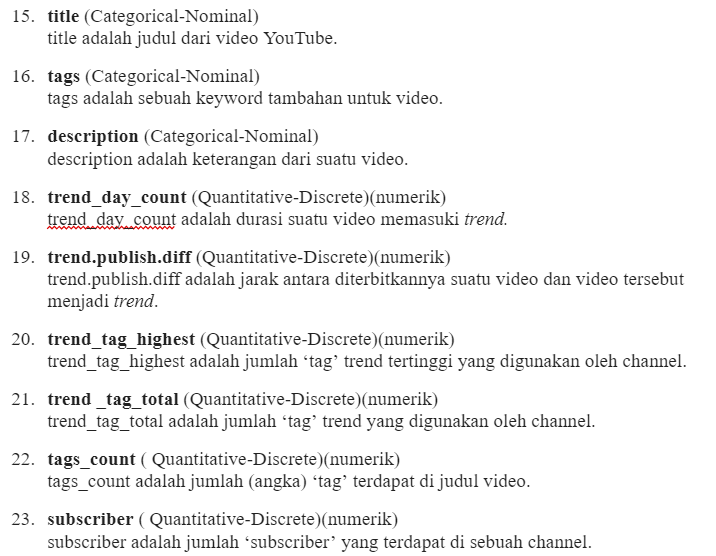
<!-- 1. video_id : Categorical-Nominal
1. last_trending_date : Categorical-Ordinal
1. publish_date : Categorical-Ordinal
1. publish_hour : Categorical-Ordinal
1. category_id : Quantitative-Ordinal
1. channel_title : Categorical-Nominal
1. views : Quantitative-Discrete (numerik)
1. likes : Quantitative-Discrete (numerik)
1. dislikes : Quantitative-Discrete (numerik)
1. comment_count : Quantitative-Discrete (numerik)
1. comments_disabled : Categorical-Binary
1. ratings_disabled : Categorical-Binary
1. tag_appeared_in_title_count : Quantitative-Discrete (numerik)
1. tag_appeared_in_title : Categorical-Binary
1. title : Categorical-Nominal
1. tags : Categorical-Nominal
1. description : Categorical-Nominal
1. trend_day_count : Quantitative-Discrete (numerik)
1. trend.publish.diff : Quantitative-Discrete (numerik)
1. trend_tag_highest : Quantitative-Discrete (numerik)
1. trend_tag_total : Quantitative-Discrete (numerik)
1. tags_count : Quantitative-Discrete (numerik)
1. subscriber : Quantitative-Discrete (numerik) -->

# Statistics

In [10]:
# Sampel Data
yt

video_id last_trending_date publish_date  publish_hour  category_id  \
0     2kyS6SvSYSE         2017-11-20   2017-11-13            17           22   
1     1ZAPwfrtAFY         2017-11-20   2017-11-13             7           24   
2     5qpjK5DgCt4         2017-11-20   2017-11-12            19           23   
3     puqaWrEC7tY         2017-11-20   2017-11-13            11           24   
4     d380meD0W0M         2017-11-19   2017-11-12            18           24   
...           ...                ...          ...           ...          ...   
4542  CvkOWb1U-LI         2018-03-05   2018-03-02            19           28   
4543  _CFJ1u-DIBc         2018-03-05   2018-03-02            19           28   
4544  Juad74hE6rs         2018-03-05   2018-03-01            16           26   
4545  n_S8d_1KVhU         2018-03-05   2018-03-01            18           20   
4546  Eouvsy8JdLU         2018-03-05   2018-02-27            16           24   

              channel_title    views   likes  dislikes  comment_count  ...  \
0              CaseyNeistat  2564903   96321      7972          22149  ...   
1           LastWeekTonight  6109402  151250     11508          19820  ...   
2              Rudy Mancuso  5315471  187303      7278           9990  ...   
3     Good Mythical Morning   913268   16729      1386           2988  ...   
4                  nigahiga  2819118  153395      2416          20573  ...   
...                     ...      ...     ...       ...            ...  ...   
4542            Techquickie   230223   10926       446            791  ...   
4543           Tech Insider   128591    2924       316            564  ...   
4544         Gemma Stafford    55076    3436        35            621  ...   
4545           Scott Manley    48505    2504        17            350  ...   
4546         The Action Lab   141285    4998       222            858  ...   

      tag_appeared_in_title  \
0                     False   
1                     False   
2                      True   
3                      True   
4                      True   
...                     ...   
4542                   True   
4543                   True   
4544                   True   
4545                   True   
4546                   True   

                                                  title  \
0                    WE WANT TO TALK ABOUT OUR MARRIAGE   
1     The Trump Presidency: Last Week Tonight with J...   
2     Racist Superman | Rudy Mancuso, King Bach & Le...   
3                      Nickelback Lyrics: Real or Fake?   
4                              I Dare You: GOING BALD!?   
...                                                 ...   
4542              Why Are Progress Bars Wrong So Often?   
4543                     Why Does Bluetooth Still Suck?   
4544  Crazy Frosting Recipe: The Best Buttercream Fr...   
4545  How Satellites Capture 400 Megapixel Images Of...   
4546  Is It Possible To Bend Light With Your Finger?...   

                                                   tags  \
0                                       SHANtell martin   
1     last week tonight trump presidency|last week t...   
2     racist superman|rudy|mancuso|king|bach|racist|...   
3     rhett and link|gmm|good mythical morning|rhett...   
4     ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...   
...                                                 ...   
4542  progress|bar|estimate|time|windows|inaccurate|...   
4543  Tech Insider|TI|Tech|Science|Innovation|Digita...   
4544  Frosting|Crazy Frosting|Buttercream Frosting|B...   
4545  himawari|goes-16|goes-r|goes-s|weather|meteoro...   
4546  light|bend|light bender|bender|finger|crazy|aw...   

                                            description trend_day_count  \
0     SHANTELL'S CHANNEL - https://www.youtube.com/s...               7   
1     One year after the presidential election, John...               7   
2     WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...               7   
3     Today we find 

In [11]:
# Sampel data yang telah diurutkan berdasarkan "publish_hour" dari terkecil
yt.sort_values(["publish_hour"], ascending=[1])

video_id last_trending_date publish_date  publish_hour  category_id  \
1214  A_fUji0jTAE         2017-12-13   2017-12-06             0           23   
3558  C535gMNdiDk         2018-02-04   2018-01-29             0           27   
1726  oYvw0GryNs8         2017-12-19   2017-12-18             0           23   
4307  oCAbvclXL6I         2018-03-05   2018-02-24             0           24   
4310  l_eR85kmWbY         2018-03-05   2018-02-24             0           28   
...           ...                ...          ...           ...          ...   
3563  NooW_RbfdWI         2018-02-14   2018-02-04            23           24   
3560  9Szts88zY4o         2018-02-05   2018-02-04            23           24   
346   MMGrzOu1amQ         2017-11-19   2017-11-15            23           24   
3717  EP_2NXe0_1g         2018-02-08   2018-01-31            23           25   
318   fGTfbMioezc         2017-11-17   2017-10-25            23            1   

           channel_title     views   likes  dislikes  comment_count  ...  \
1214      Pittsburgh Dad    243102    4570       247            679  ...   
3558        Check It Out    894787    3192      1146            757  ...   
1726      IISuperwomanII   1629871  159941      2175          12628  ...   
4307         MeganBatoon    191871   10780       380            882  ...   
4310     Because Science     78528    3546        62            561  ...   
...                  ...       ...     ...       ...            ...  ...   
3563  Universal Pictures  21113889  254342      7076          20099  ...   
3560           Star Wars   2580817   74716      4678          14342  ...   
346    Simply Nailogical   2259888   99803      1074          15766  ...   
3717        CBS New York    548993     855       602           1696  ...   
318          LOFTON SHAW      5318      20         1              3  ...   

      tag_appeared_in_title  \
1214                   True   
3558                   True   
1726                   True   
4307                   True   
4310                   True   
...                     ...   
3563                   True   
3560                   True   
346                    True   
3717                   True   
318                   False   

                                                  title  \
1214        Dad Reacts to Steelers vs Bengals (Week 13)   
3558  Cutest Rat taking a shower like a Human / Rata...   
1726          Really Offensive Video (ft. Shane Dawson)   
4307  I Tried Following a PatrickStarrr Khloe Kardas...   
4310  The Most Toxic Kiss on Earth | Because Science...   
...                                                 ...   
3563  Jurassic World: Fallen Kingdom - Official Trai...   
3560     Solo: A Star Wars Story Big Game TV Spot (:45)   
346   HOLO CAPPUCCINO | DIY Diamond Cappuccino test ...   
3717  Kiss Between Tom Brady, 11-Year-Old Son Raises...   
318                                   Marvel's Inhumans   

                                                   tags  \
1214  Pittsburgh Dad|Curt Wootton|Chris Preksta|Stee...   
3558  rat|taking|shower|rat taking a shower|pets|rat...   
1726  iisuperwomanii|superwoman|team|super”|comedy|s...   
4307  megan batoon|comedy|diy|cooking|funny|how|to|t...   
4310  Nerdist|Fvid|Because Science|Kyle Hill|batman|...   
...                                                 ...   
3563  Jurassic World|Fallen Kingdom|Dinosaur|T-Rex|C...   
3560  star wars|han solo|solo|emilia clarke|big game...   
346   nails|nail art|nail tutorial|beauty tutorial|n...   
3717                  CBS2 News At 5|Tom Brady|Facebook   
318                                                 NaN   

                                            description trend_day_count  \
1214  Dad reacts to the violent clash between NFL ri...               6   
3558  Watch as this little rat washes himself in the...               1   
1726  I'm all for learning and growing but sometimes...               1   
4307  But are you subscribed tho: https://ww

In [12]:
# Sampel data yang telah diurutkan berdasarkan "views" dari terkecil
yt.sort_values(["views"], ascending=[1])

video_id last_trending_date publish_date  publish_hour  category_id  \
3164  y6KYFcta4SE         2018-01-28   2018-01-23            15           25   
315   -JVITToppE0         2017-11-17   2017-11-13            20           17   
3212  dQMZLXaa1L8         2018-01-29   2018-01-10            23           17   
2822  zeQaJGkFyqQ         2018-01-18   2018-01-16            12           25   
160   qg0GdM60syI         2017-11-14   2017-03-31            21           27   
...           ...                ...          ...           ...          ...   
3559  BhIEIO0vaBE         2018-02-14   2018-02-04            20           22   
2181  LsoLEjrDogU         2018-01-12   2018-01-04             4           10   
855   6ZfuNTqbHE8         2017-12-08   2017-11-29            13           24   
328   TyHvyGVs42U         2017-11-26   2017-11-17             5           10   
1149  FlsCjmMhFmw         2017-12-14   2017-12-06            17           24   

             channel_title      views    likes  dislikes  comment_count  ...  \
3164                 Newsy        559        9         0              4  ...   
315          GoDucksdotcom        704       10         2              5  ...   
3212      Palo Alto Online        745        1         0              0  ...   
2822      Associated Press        748        9         0              0  ...   
160        90s Commercials        773        2         0              0  ...   
...                    ...        ...      ...       ...            ...  ...   
3559          Kylie Jenner   56111957        0         0              0  ...   
2181            Bruno Mars   57951412  1919583     73239         133601  ...   
855   Marvel Entertainment   91933007  2625661     53709         350458  ...   
328          LuisFonsiVEVO  102012605  2376636    117196         134224  ...   
1149     YouTube Spotlight  149376127  3093544   1643059         810698  ...   

      tag_appeared_in_title  \
3164                   True   
315                   False   
3212                  False   
2822                   True   
160                    True   
...                     ...   
3559                  False   
2181                   True   
855                    True   
328                    True   
1149                   True   

                                                  title  \
3164   1 dead, others injured after Ky. school shooting   
315       Coach Taggart Monday Presser Ahead of Arizona   
3212                                      Artwork Forge   
2822     Raw: 3 South Carolina Deputies, 1 Officer Shot   
160              Huffy Metaloid Bicycle Commercial 1997   
...                                                 ...   
3559                                    To Our Daughter   
2181  Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...   
855   Marvel Studios' Avengers: Infinity War Officia...   
328           Luis Fonsi, Demi Lovato - Échame La Culpa   
1149  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   

                                                   tags  \
3164  shooting|kentucky|breaking news|u.s. news|mars...   
315   Oregon|Ducks|college athletics|college footbal...   
3212                                                NaN   
2822  news|associated press|ap|ap online|associated ...   
160                               90s commercials|Huffy   
...                                                 ...   
3559   Kylie Jenner|Kylie|Travis Scott|Baby|Annoucement   
2181  Bruno Mars|Finesse|Cardi B|Finesse Remix|Bruno...   
855   marvel|comics|comic books|nerdy|geeky|super he...   
328   Luis|Fonsi|Demi|Lovato|Échame|La|Culpa|UMLE|La...   
1149  Rewind|Rewind 2017|youtube rewind 2017|#YouTub...   

                                            description trend_day_count  \
3164  Kentucky Gov. Matt Bevin confirmed there was a...               3   
315   Coach Taggart addresses the media ahead of the...               2   
3212  Artwork Forge II - an art installation created...               3

In [13]:
# Sampel data yang telah diurutkan berdasarkan "likes" dari terbesar
yt.sort_values(["likes"], ascending=[0])

video_id last_trending_date publish_date  publish_hour  category_id  \
1149  FlsCjmMhFmw         2017-12-14   2017-12-06            17           24   
681   kTlv5_Bs8aw         2017-12-01   2017-11-24             9           10   
4464  OK3GJ0WIQ8s         2018-03-05   2018-03-01            15           10   
855   6ZfuNTqbHE8         2017-12-08   2017-11-29            13           24   
328   TyHvyGVs42U         2017-11-26   2017-11-17             5           10   
...           ...                ...          ...           ...          ...   
856   nx1R-eHSkfM         2017-12-07   2017-11-29            14           10   
192   wRGldR_SQAA         2017-11-14   2017-11-09            18           22   
4516  _EMxJMU1dCo         2018-03-05   2018-03-02            18           26   
2145  aBL027wEtg8         2018-01-09   2018-01-01             5           10   
3559  BhIEIO0vaBE         2018-02-14   2018-02-04            20           22   

             channel_title      views    likes  dislikes  comment_count  ...  \
1149     YouTube Spotlight  149376127  3093544   1643059         810698  ...   
681                ibighit   36857298  2729292     47896         546100  ...   
4464               ibighit   21582276  2626585     27633         471584  ...   
855   Marvel Entertainment   91933007  2625661     53709         350458  ...   
328          LuisFonsiVEVO  102012605  2376636    117196         134224  ...   
...                    ...        ...      ...       ...            ...  ...   
856               Snapchat    3511909        0         0              0  ...   
192           Steve Kovach       2259        0         0              0  ...   
4516                  Tati     839375        0         0              0  ...   
2145        mariahxlambily    1216232        0         0           5286  ...   
3559          Kylie Jenner   56111957        0         0              0  ...   

      tag_appeared_in_title  \
1149                   True   
681                    True   
4464                  False   
855                    True   
328                    True   
...                     ...   
856                    True   
192                   False   
4516                   True   
2145                   True   
3559                  False   

                                                  title  \
1149  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
681   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...   
4464                         j-hope 'Daydream (백일몽)' MV   
855   Marvel Studios' Avengers: Infinity War Officia...   
328           Luis Fonsi, Demi Lovato - Échame La Culpa   
...                                                 ...   
856                      The New Snapchat in 60 Seconds   
192                                  Apple Clips sample   
4516         GET READY WITH ME | Halo Beauty Launch Day   
2145  Mariah Carey - Live At Dick Clark's New Year's...   
3559                                    To Our Daughter   

                                                   tags  \
1149  Rewind|Rewind 2017|youtube rewind 2017|#YouTub...   
681                     BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   
4464                    BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄   
855   marvel|comics|comic books|nerdy|geeky|super he...   
328   Luis|Fonsi|Demi|Lovato|Échame|La|Culpa|UMLE|La...   
...                                                 ...   
856   new snapchat|version 2|snap inc|brandnew|updat...   
192                                                 NaN   
4516  YouTube|Beauty|Makeup|Tutorial|Review|Tati|Wes...   
2145  Mariah|Carey|Mariah Carey|Vocals|Vocal Fail|Vo...   
3559   Kylie Jenner|Kylie|Travis Scott|Baby|Annoucement   

                                            description trend_day_count  \
1149  YouTube Rewind 2017. Celebrating the videos, p...               8   
681   BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...               7   
4464  j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...               4

In [14]:
# Sampel data yang telah diurutkan berdasarkan "dislikes" dari terbesar
yt.sort_values(["dislikes"], ascending=[0])

video_id last_trending_date publish_date  publish_hour  category_id  \
2134  QwZT7T-TXT0         2018-01-09   2018-01-02            16           24   
1149  FlsCjmMhFmw         2017-12-14   2017-12-06            17           24   
3067  oWjxSkJpxFU         2018-02-01   2018-01-24            18           29   
3747  _5d-sQ7Fh5M         2018-02-09   2018-02-04            22           24   
1749  LFhT6H6pRWg         2017-12-21   2017-12-13            22           22   
...           ...                ...          ...           ...          ...   
2114  RIAVKKzOocc         2018-01-05   2017-12-26             7           24   
1946  _oZIbFolJTw         2017-12-28   2017-11-29             3            1   
1353  QOdVw75Vbv4         2017-12-12   2017-12-07            20           24   
3990  LR2edIotyE8         2018-02-19   2018-02-09            23           24   
3559  BhIEIO0vaBE         2018-02-14   2018-02-04            20           22   

          channel_title      views    likes  dislikes  comment_count  ...  \
2134   Logan Paul Vlogs   37539570  1402578   1674420        1361580  ...   
1149  YouTube Spotlight  149376127  3093544   1643059         810698  ...   
3067   Logan Paul Vlogs   24286474  1988746    497847         658130  ...   
3747   Logan Paul Vlogs   14161833  1216340    291900         436698  ...   
1749       Daily Caller    1205682     9572    228426          29634  ...   
...                 ...        ...      ...       ...            ...  ...   
2114        Josh Levine       2086        9         0              0  ...   
1946          VOsprey22       3598       28         0              3  ...   
1353  New York Magazine       3479       34         0              4  ...   
3990             TV One     202879        0         0            194  ...   
3559       Kylie Jenner   56111957        0         0              0  ...   

      tag_appeared_in_title  \
2134                  False   
1149                   True   
3067                   True   
3747                   True   
1749                   True   
...                     ...   
2114                  False   
1946                   True   
1353                   True   
3990                   True   
3559                  False   

                                                  title  \
2134                                          So Sorry.   
1149  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
3067                         Suicide: Be Here Tomorrow.   
3747                                LOGAN PAUL IS BACK!   
1749              PSA from Chairman of the FCC Ajit Pai   
...                                                 ...   
2114  Animal electricity - Fingerling Fart Monkey Te...   
1946                           RGB Pixel Christmas Tree   
1353                 The Evolution of the Movie Trailer   
3990  Did Beyonce Have To Check An Actress Talking T...   
3559                                    To Our Daughter   

                                                   tags  \
2134  logan paul vlog|logan paul|logan|paul|olympics...   
1149  Rewind|Rewind 2017|youtube rewind 2017|#YouTub...   
3067  logan paul vlog|logan paul|logan|paul|logan pa...   
3747  logan paul vlog|logan paul|logan|paul|olympics...   
1749  thedc|dc|washington dc|washington|the district...   
...                                                 ...   
2114                                                NaN   
1946  raspberry pi|ws2811|sandevices e682|christmas ...   
1353                             movie|trailer|trailers   
3990  TV One|Radio One|Interactive One|Beyonce|JAY-Z...   
3559   Kylie Jenner|Kylie|Travis Scott|Baby|Annoucement   

                                            description trend_day_count  \
2134                                                NaN               7   
1149  YouTube Rewind 2017. Celebrating the videos, p...               8   
3067  National Suicide Prevention Lifeline\nCall 1-8...               8   
3747  Do It Different. Be a Mave

In [15]:
# Mencari statistik pada data bertipe quantitative-discrete (numerik)
yt_now.describe()

views         likes      dislikes  comment_count  \
count  4.547000e+03  4.547000e+03  4.547000e+03   4.547000e+03   
mean   1.265665e+06  3.919696e+04  2.616788e+03   4.938788e+03   
std    4.526133e+06  1.419793e+05  3.662803e+04   3.110122e+04   
min    5.590000e+02  0.000000e+00  0.000000e+00   0.000000e+00   
25%    9.089650e+04  1.486000e+03  7.600000e+01   2.260000e+02   
50%    3.188400e+05  7.397000e+03  2.910000e+02   8.540000e+02   
75%    1.006673e+06  2.557550e+04  1.023000e+03   2.862500e+03   
max    1.493761e+08  3.093544e+06  1.674420e+06   1.361580e+06   

       tag_appeared_in_title_count  trend_day_count  trend.publish.diff  \
count                  4547.000000      4547.000000         4547.000000   
mean                      2.961293         4.830658           34.429954   
std                       2.482547         2.614707          247.514298   
min                       0.000000         1.000000            0.000000   
25%                       1.000000         3.000000            5.000000   
50%                       3.000000         5.000000            6.000000   
75%                       4.000000         7.000000            7.000000   
max                      18.000000        14.000000         4215.000000   

       trend_tag_highest  trend_tag_total   tags_count    subscriber  
count        4547.000000      4547.000000  4547.000000  4.525000e+03  
mean          130.335386       437.941060    19.209369  3.164303e+06  
std           150.400756       616.584168    12.452361  4.831613e+06  
min             0.000000         0.000000     0.000000  0.000000e+00  
25%            22.000000        68.000000     9.000000  2.466470e+05  
50%            85.000000       217.000000    18.000000  1.198769e+06  
75%           151.000000       515.000000    29.000000  3.766915e+06  
max           488.000000      3644.000000    69.000000  2.867694e+07

In [16]:
# Percentile
print(f'''Percentile 10%:
{yt_now.quantile(0.1)}\n''')

print(f'''Percentile 25%:
{yt_now.quantile(0.25)}\n''')

print(f'''Percentile 50%:
{yt_now.quantile(0.5)}\n''')

print(f'''Percentile 75%:
{yt_now.quantile(0.75)}\n''')

print(f'''Percentile 90%:
{yt_now.quantile(0.9)}''')

Percentile 10%:
views                          24853.0
likes                            215.0
dislikes                          15.0
comment_count                     41.0
tag_appeared_in_title_count        0.0
trend_day_count                    1.0
trend.publish.diff                 2.0
trend_tag_highest                  4.0
trend_tag_total                   14.0
tags_count                         4.0
subscriber                     10245.0
Name: 0.1, dtype: float64

Percentile 25%:
views                           90896.5
likes                            1486.0
dislikes                           76.0
comment_count                     226.0
tag_appeared_in_title_count         1.0
trend_day_count                     3.0
trend.publish.diff                  5.0
trend_tag_highest                  22.0
trend_tag_total                    68.0
tags_count                          9.0
subscriber                     246647.0
Name: 0.25, dtype: float64

Percentile 50%:
views                       

In [17]:
# Mencari nilai maksimum
print(f'''Nilai maksimum:
{yt_now.max()}\n''')

# Mencari nilai minimum
print(f'''Nilai minimum:
{yt_now.min()}''')

Nilai maksimum:
views                          149376127.0
likes                            3093544.0
dislikes                         1674420.0
comment_count                    1361580.0
tag_appeared_in_title_count           18.0
trend_day_count                       14.0
trend.publish.diff                  4215.0
trend_tag_highest                    488.0
trend_tag_total                     3644.0
tags_count                            69.0
subscriber                      28676937.0
dtype: float64

Nilai minimum:
views                          559.0
likes                            0.0
dislikes                         0.0
comment_count                    0.0
tag_appeared_in_title_count      0.0
trend_day_count                  1.0
trend.publish.diff               0.0
trend_tag_highest                0.0
trend_tag_total                  0.0
tags_count                       0.0
subscriber                       0.0
dtype: float64


In [18]:
# Mencari nilai range tiap data numerik
print(f'''Nilai range:
{yt_now.max()-yt_now.min()}\n''')


Nilai range:
views                          149375568.0
likes                            3093544.0
dislikes                         1674420.0
comment_count                    1361580.0
tag_appeared_in_title_count           18.0
trend_day_count                       13.0
trend.publish.diff                  4215.0
trend_tag_highest                    488.0
trend_tag_total                     3644.0
tags_count                            69.0
subscriber                      28676937.0
dtype: float64



In [19]:
# Distribusi Frekuensi
for i in yt_now:
  freq = yt[i].value_counts()
  print(f'''{i}:\n{freq}
  ''')

views:
views
8493      3
334148    2
11156     2
235293    2
88560     2
         ..
169934    1
85383     1
45684     1
60911     1
141285    1
Name: count, Length: 4532, dtype: int64
  
likes:
likes
0        27
2        10
20        9
30        9
8         8
         ..
1384      1
38431     1
98772     1
46206     1
4998      1
Name: count, Length: 3949, dtype: int64
  
dislikes:
dislikes
0        94
1        52
4        37
2        33
3        31
         ..
17542     1
1533      1
4484      1
7731      1
1742      1
Name: count, Length: 1842, dtype: int64
  
comment_count:
comment_count
0       111
4        26
1        26
2        23
3        18
       ... 
2515      1
2930      1
4837      1
3987      1
791       1
Name: count, Length: 2645, dtype: int64
  
tag_appeared_in_title_count:
tag_appeared_in_title_count
2     860
3     760
0     701
1     699
4     506
5     383
6     262
7     150
8      80
9      50
10     33
11     28
12     12
13      8
15      6
14      5
17      3

# Visualisasi

In [20]:
# Untuk memudahkan visualisasi, kita akan membuat kolom baru "year" dan "month"
# dengan data diambil dari kolom "publish_date"
yt["year"] = pd.DatetimeIndex(yt["publish_date"]).year
yt["month"] = pd.DatetimeIndex(yt["publish_date"]).month

### Perbandingan Kategori

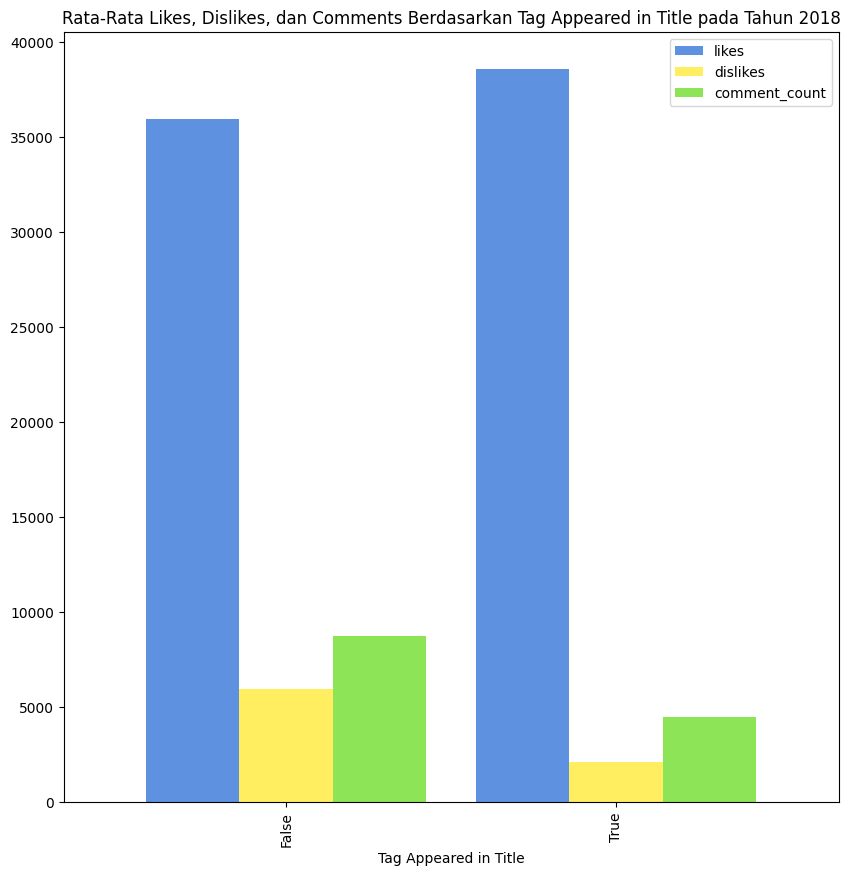

In [23]:
data2018 = yt.loc[(yt["year"]==2018)]       # Mencari data dengan kolom "publish_year" tahun 2018
df = data2018.groupby("tag_appeared_in_title")[["likes", "dislikes", "comment_count"]].mean()   # Mencari nilai rata-rata kolom "likes", "dislikes", dan "comment_count"
                                                                                              # untuk tiap kelompok data berbeda pada kolom "tag_appeared_in_title"
# Membuat visualisasi
df = df.plot(kind="bar", figsize=(10,10), width=0.85, color=["#5E92E0", "#FFEF60", "#8CE456"],
             title="Rata-Rata Likes, Dislikes, dan Comments Berdasarkan Tag Appeared in Title pada Tahun 2018")
df.set(xlabel="Tag Appeared in Title")
plt.show()

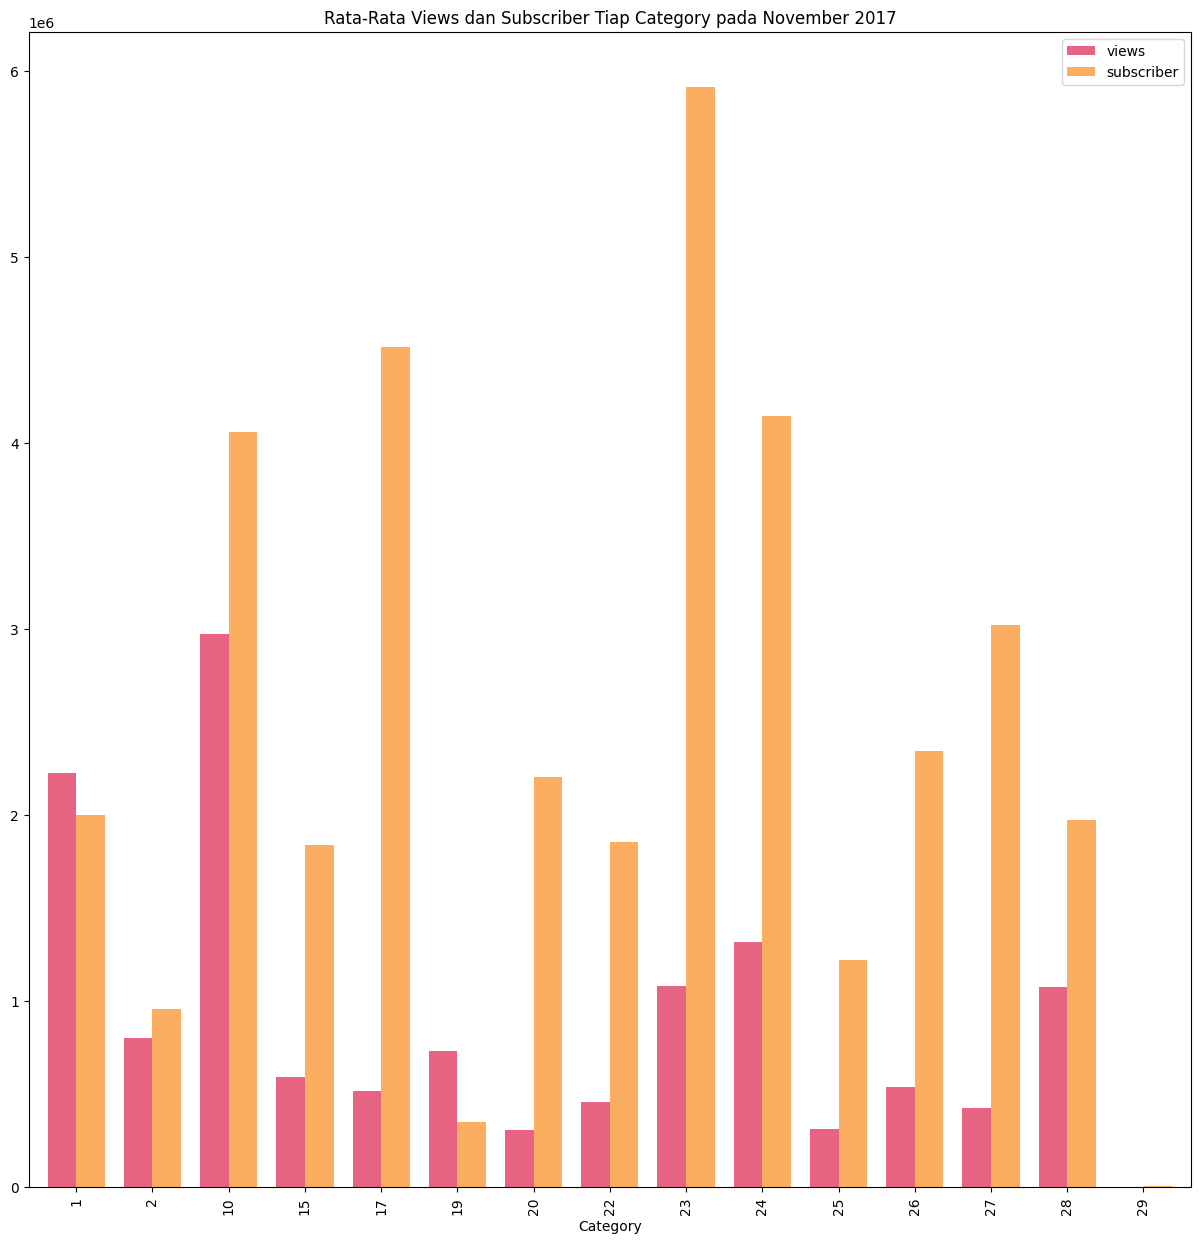

In [25]:
datanov2017 = yt.loc[(yt["year"]==2017) & (yt["month"]==11)]          # Mencari data dengan kolom "publish_year" tahun 2017 dan bulan 11
df = datanov2017.groupby("category_id")[["views","subscriber"]].mean()  # Mencari nilai rata-rata kolom "views" dan "subscriber"
                                                                      # untuk tiap kelompok data berbeda pada kolom "category_id"
# Membuat visualisasi
df = df.plot(kind="bar", figsize=(15,15), width= 0.75, color=["#E66381", "#FCAE60"],
             title="Rata-Rata Views dan Subscriber Tiap Category pada November 2017")
df.set(xlabel="Category")
plt.show()

Perbesaran category 29

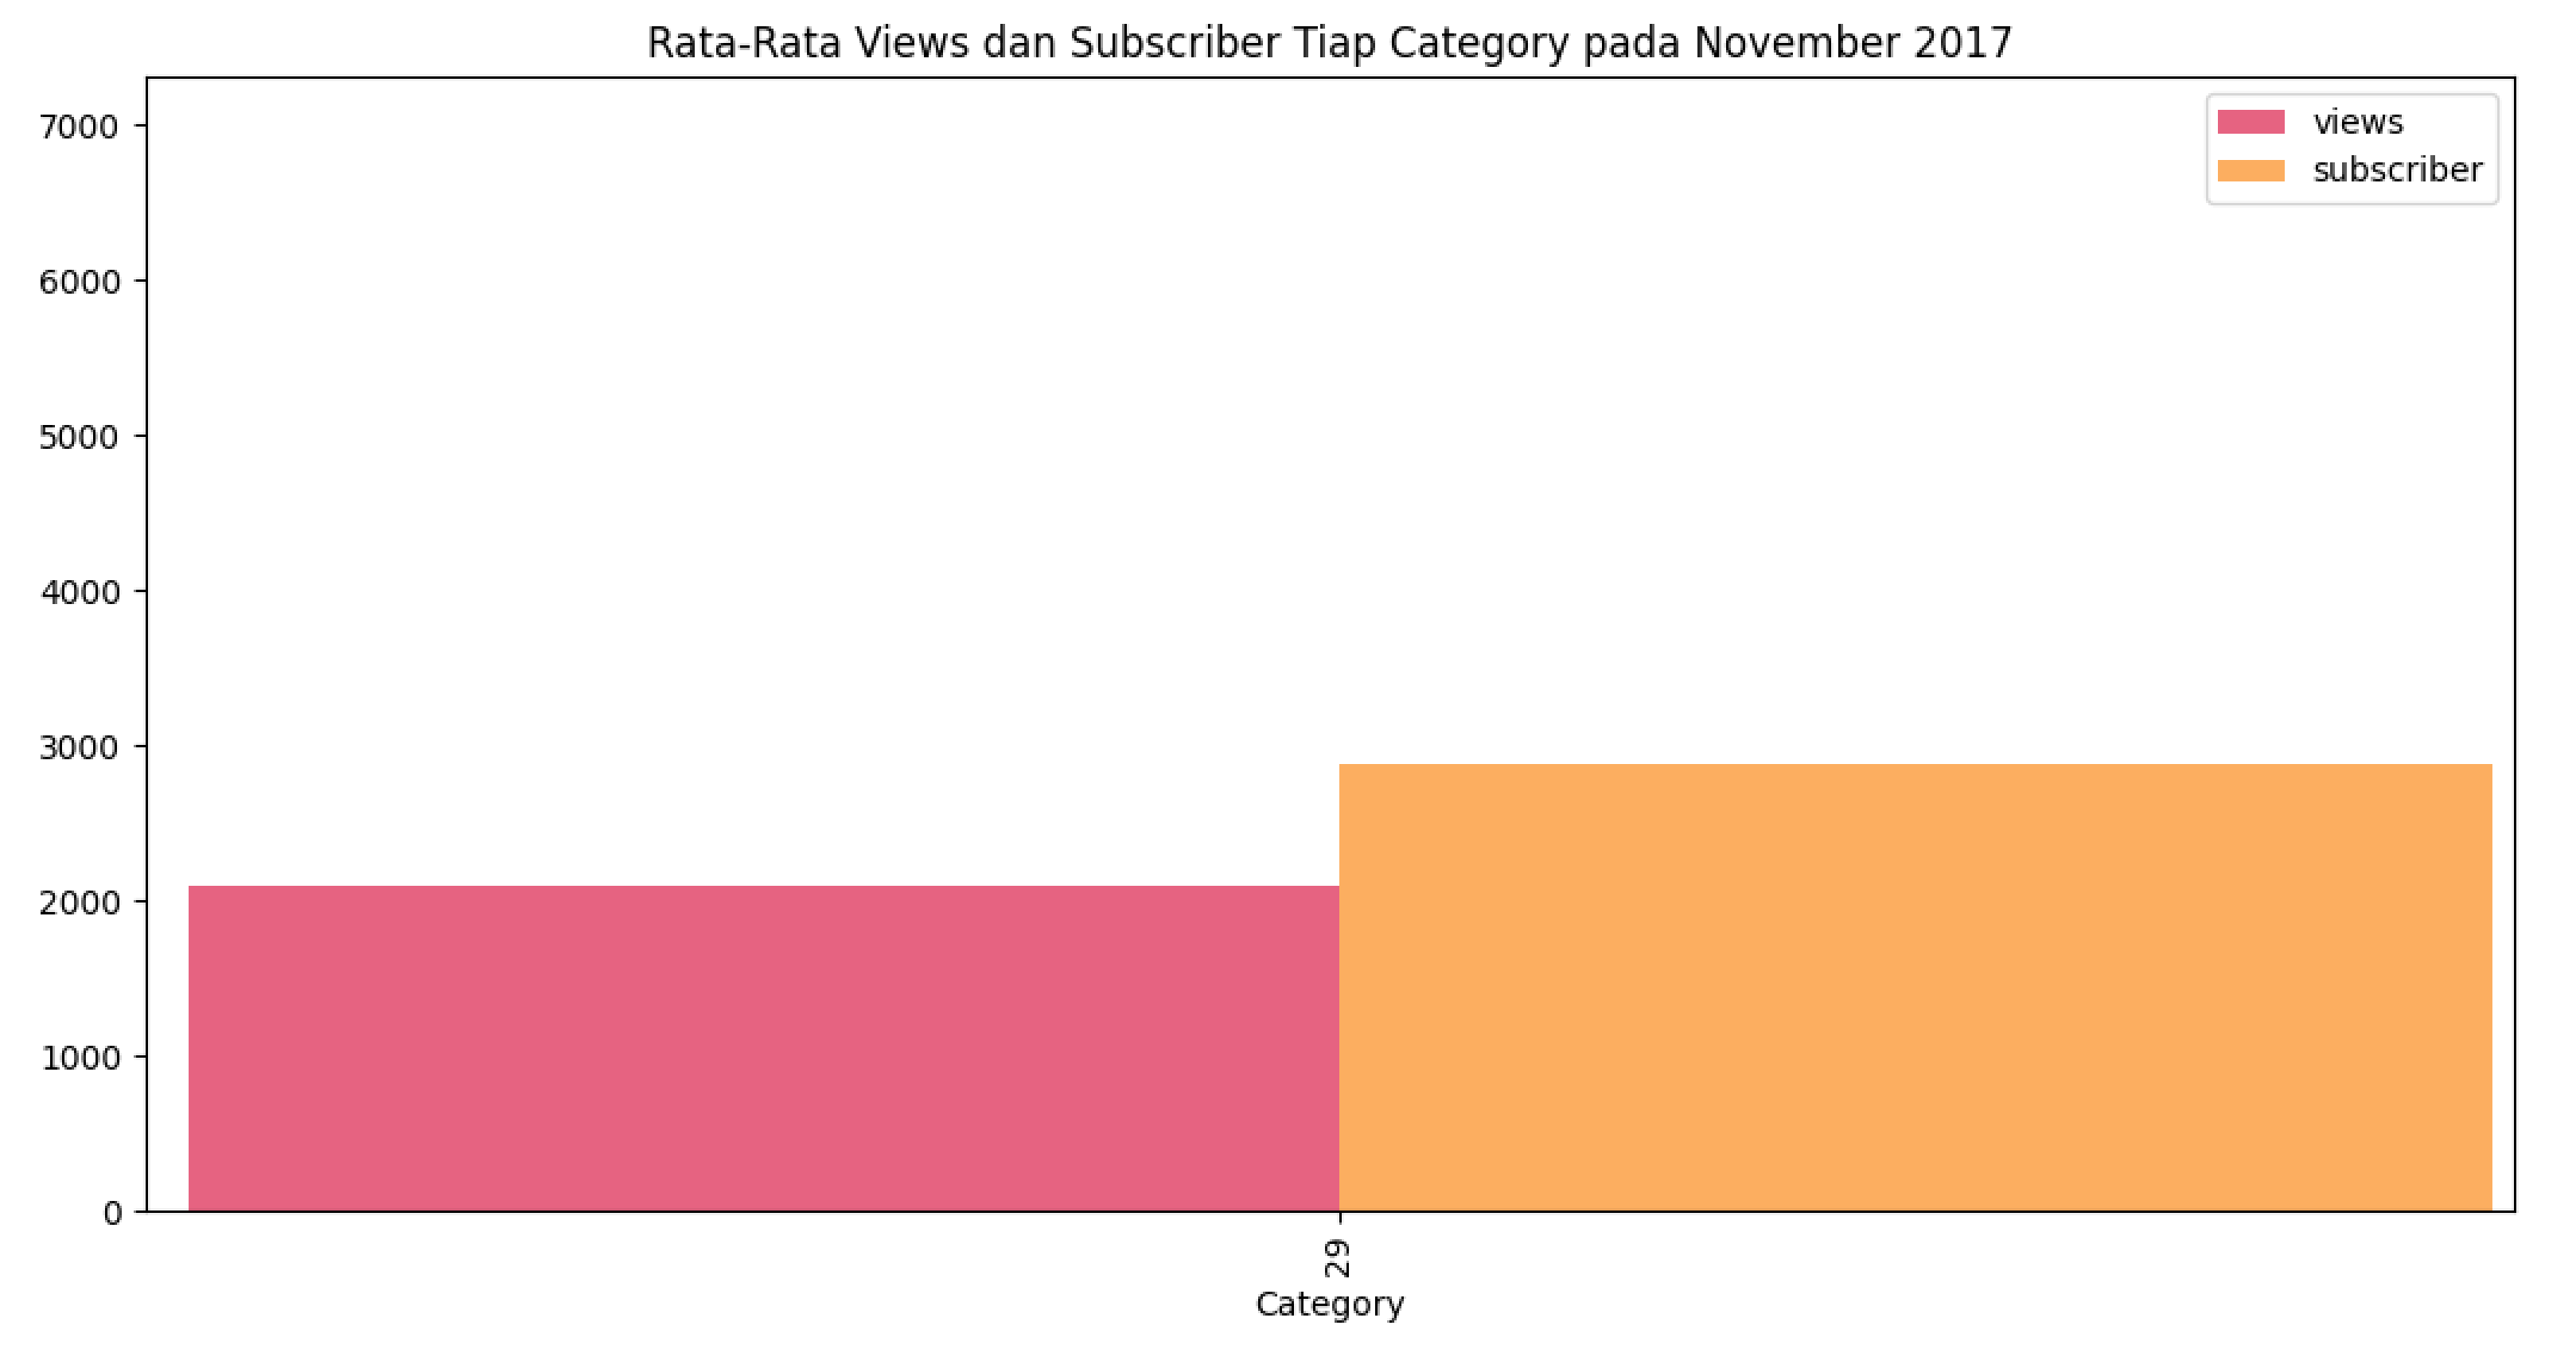

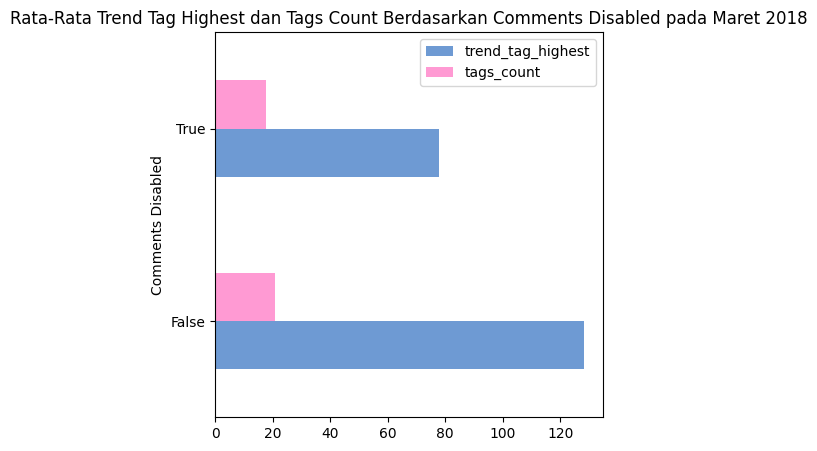

In [26]:
# Membuat kolom baru "trendyear" dan "trendmonth" dengan data dari kolom "last_trending_date"
yt["trendyear"] = pd.DatetimeIndex(yt["last_trending_date"]).year
yt["trendmonth"] = pd.DatetimeIndex(yt["last_trending_date"]).month

datamar2018 = yt.loc[(yt["trendyear"]==2018) & (yt["trendmonth"]==3)]   # Mencari data dengan kolom "last_trending_date" tahun 2018 dan bulan 3
df = datamar2018.groupby("comments_disabled")[["trend_tag_highest", "tags_count"]].mean()   # Mencari nilai rata-rata kolom "trend_tag_highest" dan "tags_count"
                                                                                          # untuk tiap kelompok data berbeda pada kolom "comments_disabled"
# Membuat visualisasi
df = df.plot(kind="barh", figsize=(5,5), width= 0.5, color=["#6E9AD3", "#FF9AD3"],
             title="Rata-Rata Trend Tag Highest dan Tags Count Berdasarkan Comments Disabled pada Maret 2018")
df.set(ylabel="Comments Disabled")
plt.show()

### Penampilan Perubahan terhadap Waktu

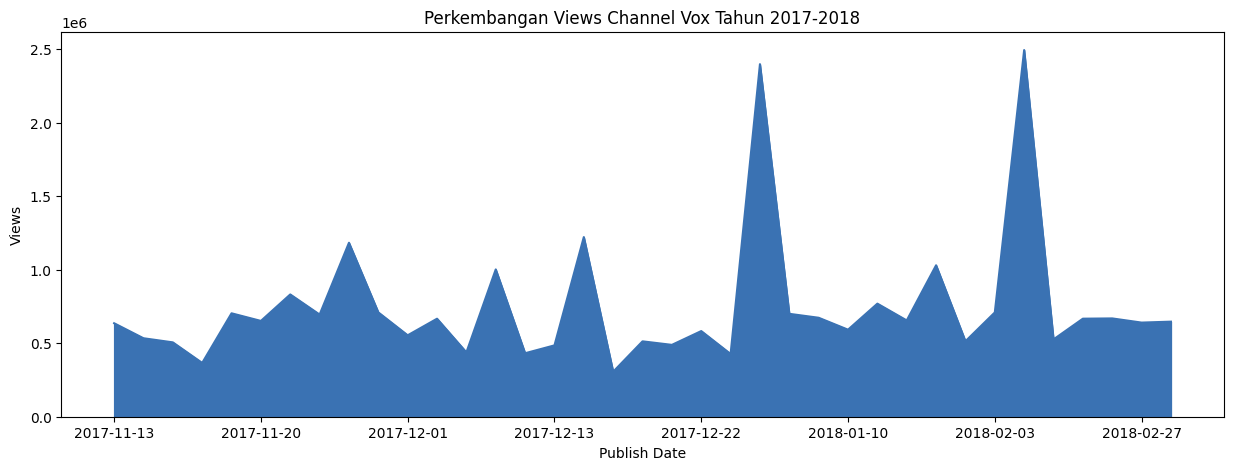

In [27]:
ytVox = yt.loc[(yt["channel_title"]=="Vox") & ((yt["year"]==2017) | (yt["year"]==2018))]    # Mencari data dengan kolom "channel_title" berisi "Vox"
                                                                                            # dan kolom "publish_year" tahun 2017 atau 2018
df = ytVox.groupby("publish_date")["views"].mean()  # Mencari nilai rata-rata kolom "views" untuk tiap kelompok data berbeda pada kolom "publish_date"

# Membuat visualisasi
df = df.plot(kind="area", figsize=(15,5), color="#3A72B3", title="Perkembangan Views Channel Vox Tahun 2017-2018")
df.set(xlabel="Publish Date", ylabel="Views")
plt.show()

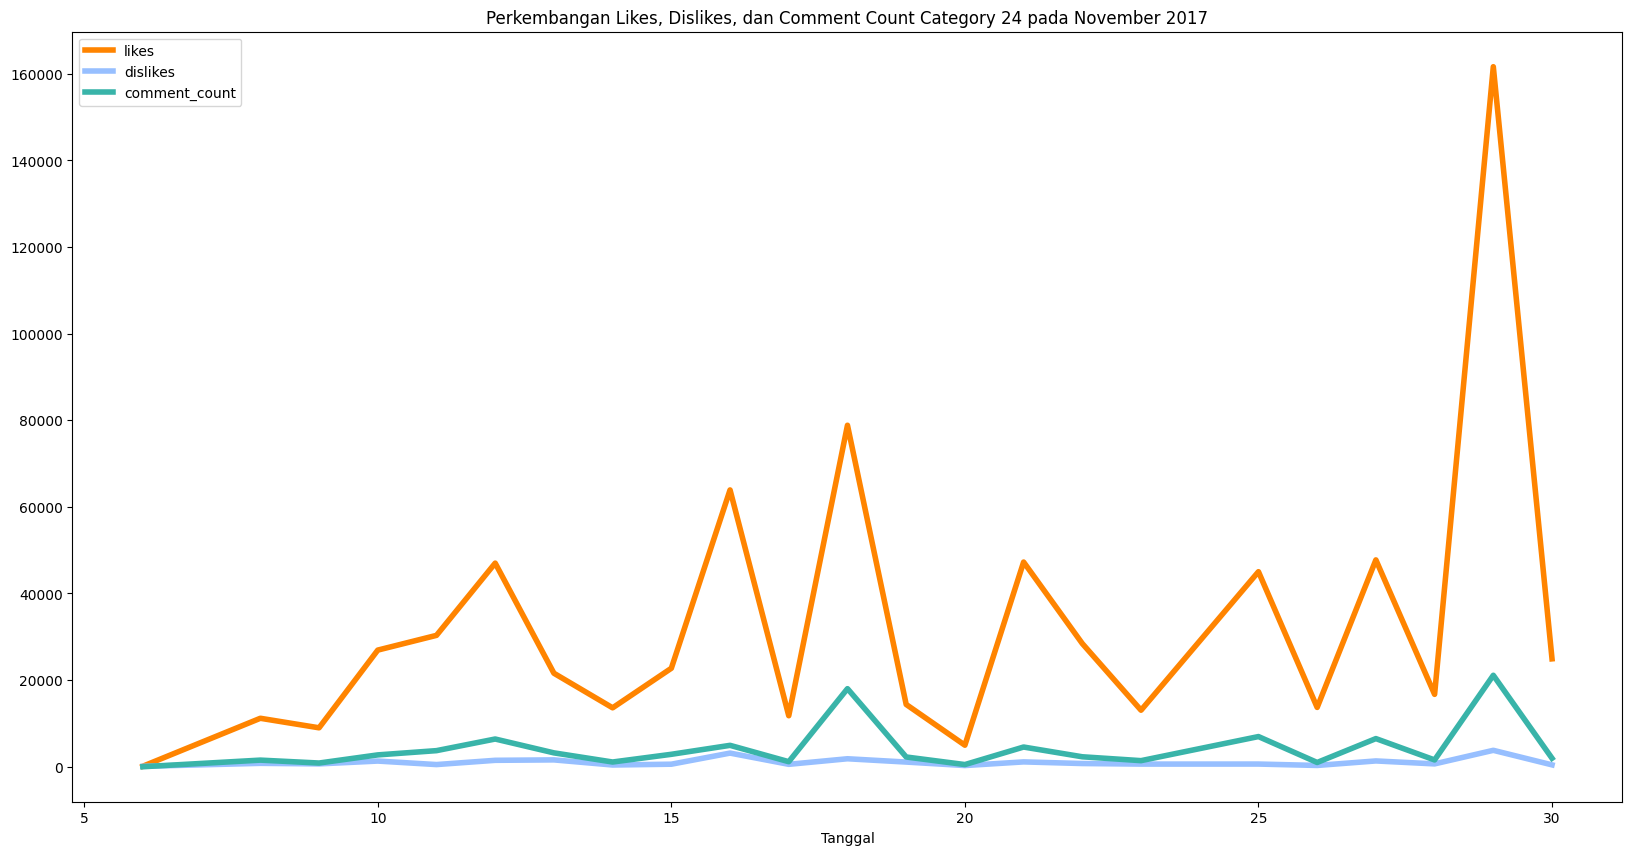

In [36]:
datanov2017 = yt.loc[(yt["category_id"]==24) & (yt["year"]==2017) & (yt["month"]==11)]  # Mencari data dengan kolom "category_id" berisi 24
                                                                                        # dan kolom "publish_date" tahun 2017 dan bulan 11
datanov2017 = datanov2017.copy()
datanov2017["day"] = pd.DatetimeIndex(datanov2017["publish_date"]).day          # Membuat kolom baru "day" berisi data tanggal dari kolom "publish_date" pada datanov2017
df = datanov2017.groupby(["day"])[["likes", "dislikes", "comment_count"]].mean()  # Mencari nilai rata-rata kolom "likes", "dislikes", dan "comment_count"
                                                                                # untuk tiap kelompok data berbeda pada kolom baru "day"
# Membuat visualisasi
df = df.plot(kind="line", figsize=(20,10), color=["#ff8400", "#97BFFF", "#39B4A9"], linewidth=4,
             title="Perkembangan Likes, Dislikes, dan Comment Count Category 24 pada November 2017")
df.set(xlabel="Tanggal")
plt.show()

Perbesaran perkembangan dislikes

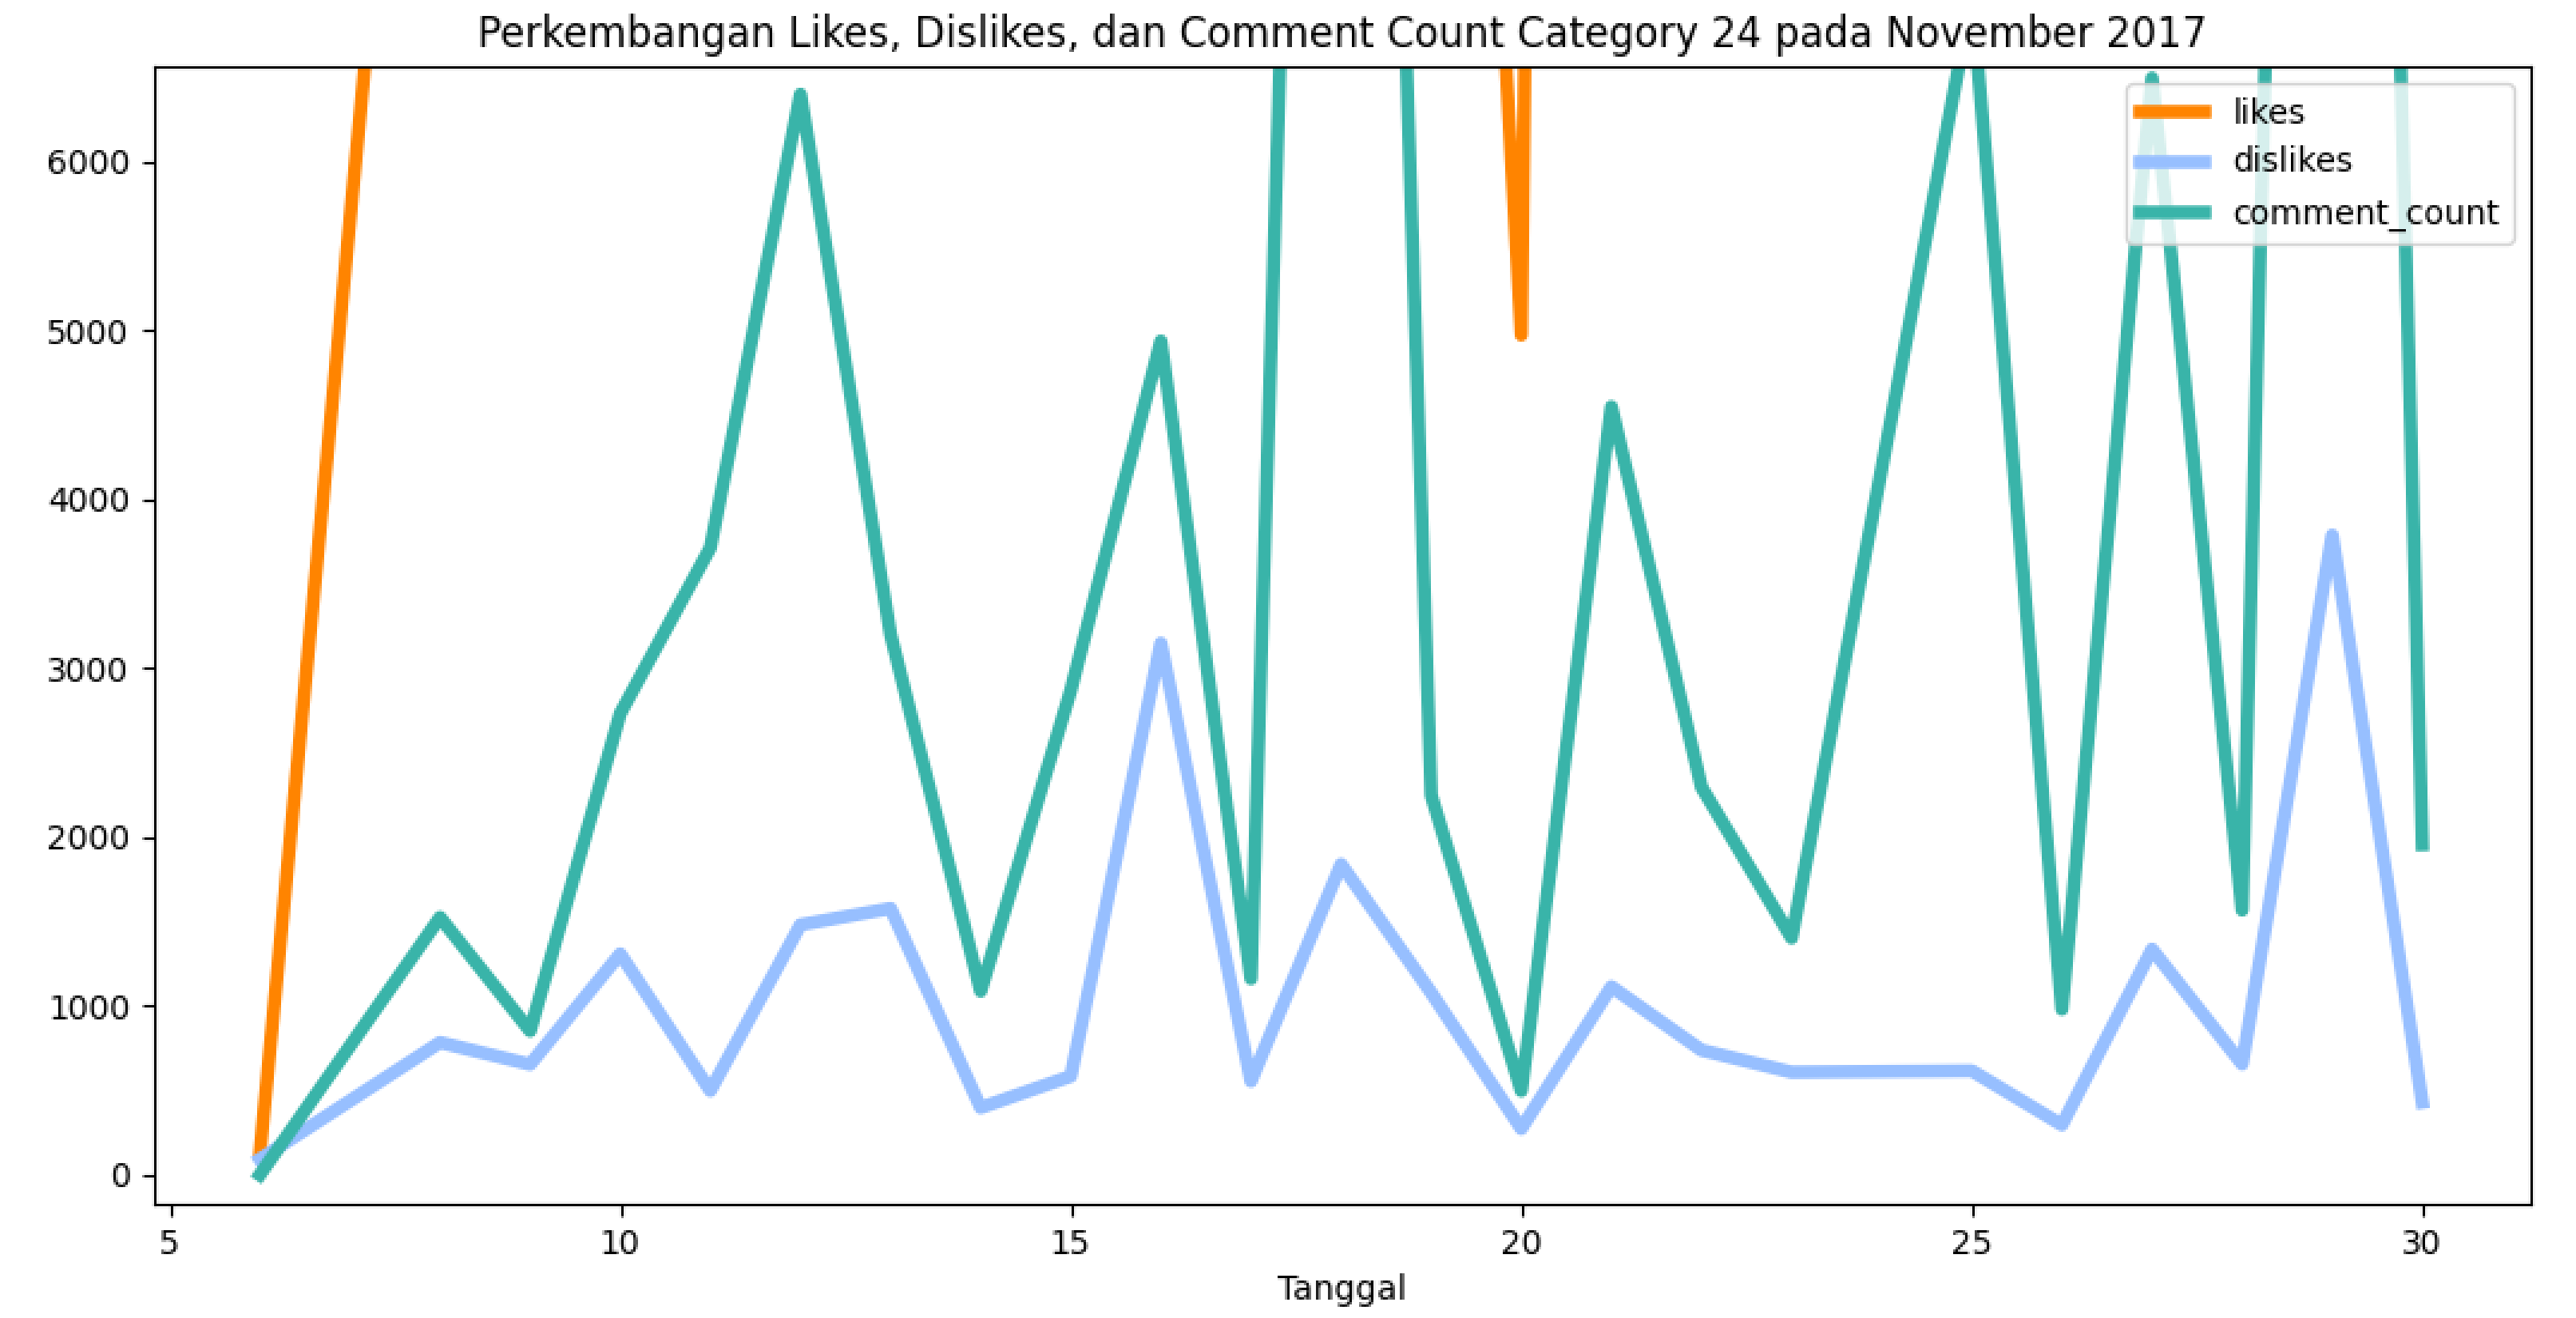

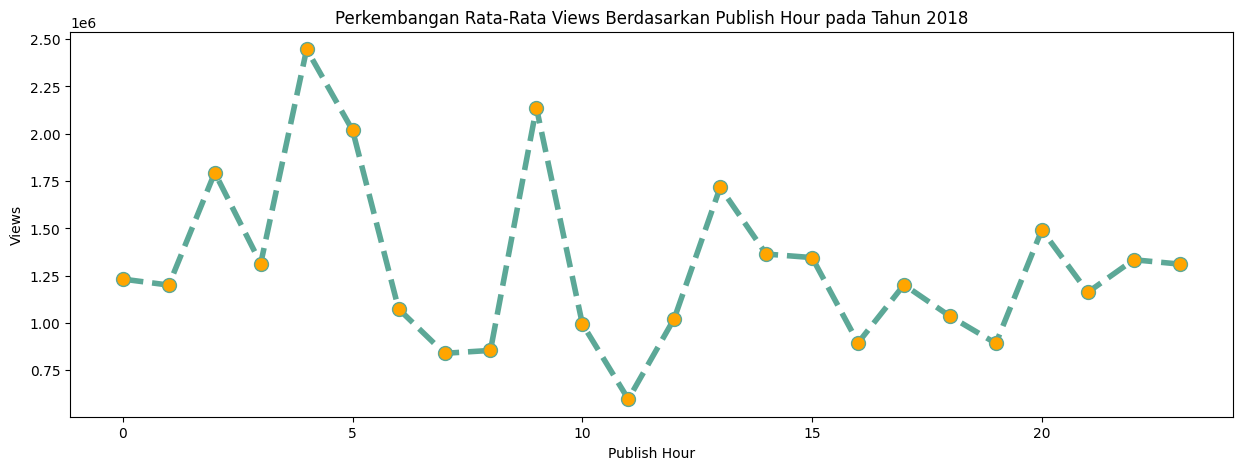

In [30]:
data2018 = yt.loc[(yt["year"]==2018)]                     # Mencari data dengan kolom "publish_year" tahun 2018
df = data2018.groupby(["publish_hour"])["views"].mean()   # Mencari nilai rata-rata kolom "views"
                                                          # untuk tiap kelompok data berbeda pada kolom "publish_hour"

# Membuat visualisasi
df = df.plot(kind="line", figsize=(15,5), color="#5CA897", linewidth=4, linestyle="--", marker="o", markersize=10,
             markerfacecolor="orange", title="Perkembangan Rata-Rata Views Berdasarkan Publish Hour pada Tahun 2018")
df.set(xlabel="Publish Hour", ylabel="Views")
plt.show()

### Penampilan Hierarki dan Hubungan Keseluruhan-Bagian

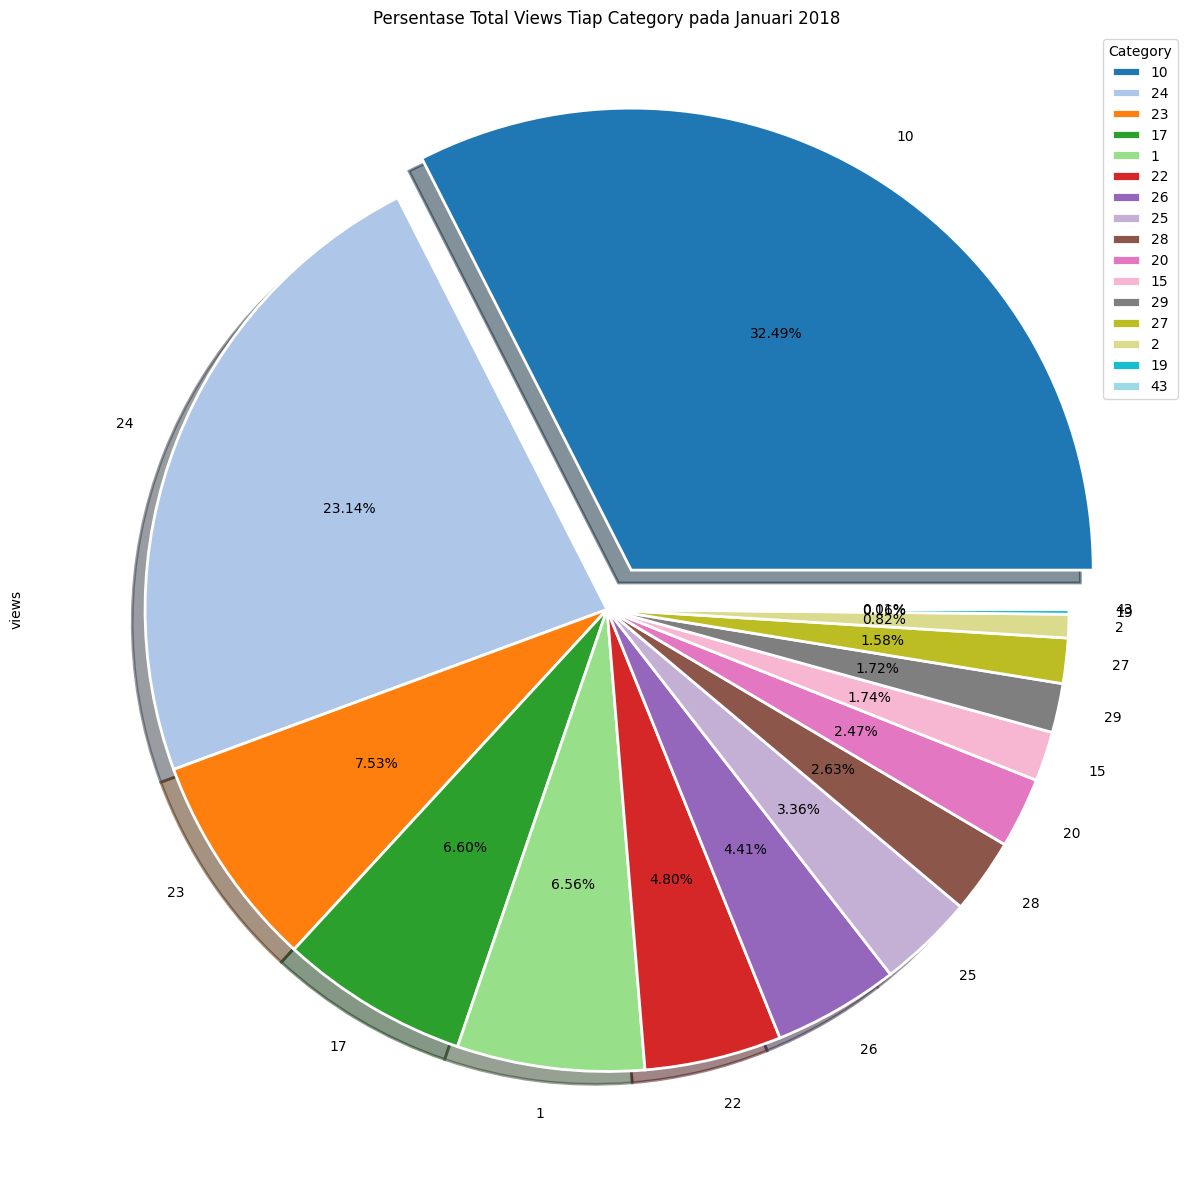

In [31]:
datajan2018 = yt.loc[(yt["year"]==2018) & (yt["month"]==1)]   # Mencari data dengan kolom "publish_year" tahun 2018 dan bulan 1
df = datajan2018.groupby(["category_id"])["views"].sum().sort_values(ascending=False)   # Mencari total nilai kolom "views"
                                                                                        # untuk tiap kelompok data berbeda pada kolom "category_id"
                                                                                        # dan mengurutkan "category_id" dari total "views" yang terbesar
# Membuat visualisasi
border = {"edgecolor": "white", "linewidth": 2, "antialiased": True}    # Membuat border pada pie chart agar lebih mudah dilihat
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)            # Membuat highlight data penting pada pie chart seperti nilai terbesar
df.plot(kind="pie", figsize=(15,15), autopct='%1.2f%%', explode=explode, wedgeprops=border, colormap="tab20",
        shadow=True, title="Persentase Total Views Tiap Category pada Januari 2018")
plt.legend(title= 'Category')
plt.show()

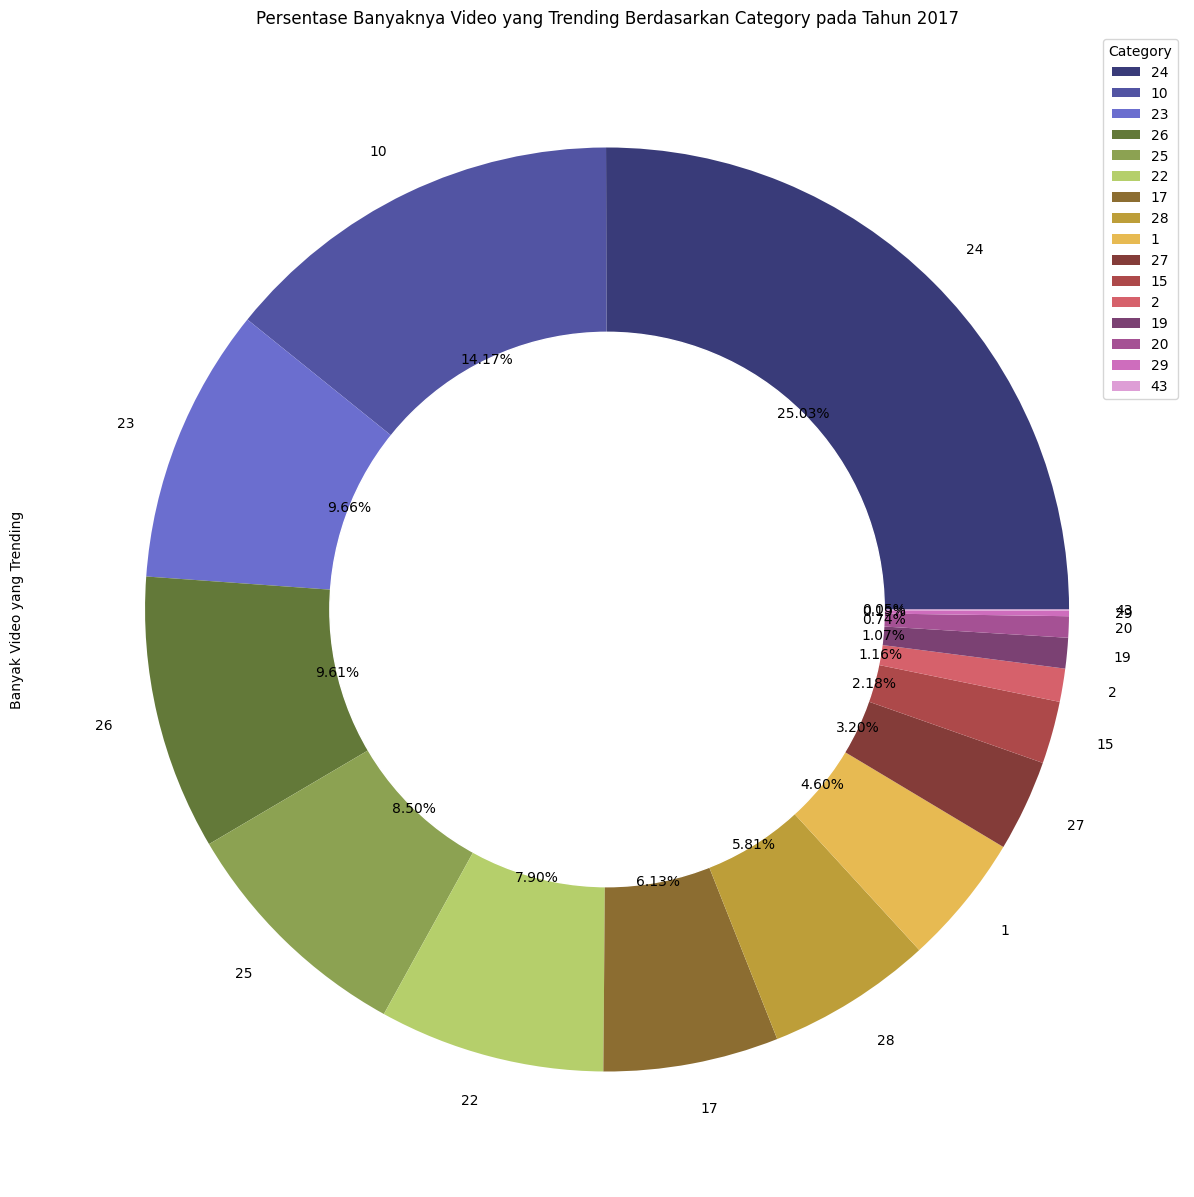

In [32]:
data2017 = yt.loc[(yt["year"]==2017)]         # Mencari data dengan kolom "publish_year" tahun 2017
df = data2017["category_id"].value_counts()   # Menghitung distribusi frekuensi kolom "category_id"

# Membuat visualisasi
df = df.plot(kind="pie", figsize=(15,15), autopct='%1.2f%%', colormap="tab20b",
             title="Persentase Banyaknya Video yang Trending Berdasarkan Category pada Tahun 2017")
df.set(ylabel="Banyak Video yang Trending")
plt.rcParams['text.color'] = 'black'
circle = plt.Circle((0,0), 0.6, color="white")    # Membuat lingkaran berwarna putih di tengah pie chart
graph = plt.gcf()
graph.gca().add_artist(circle)
plt.legend(title="Category")
plt.show()

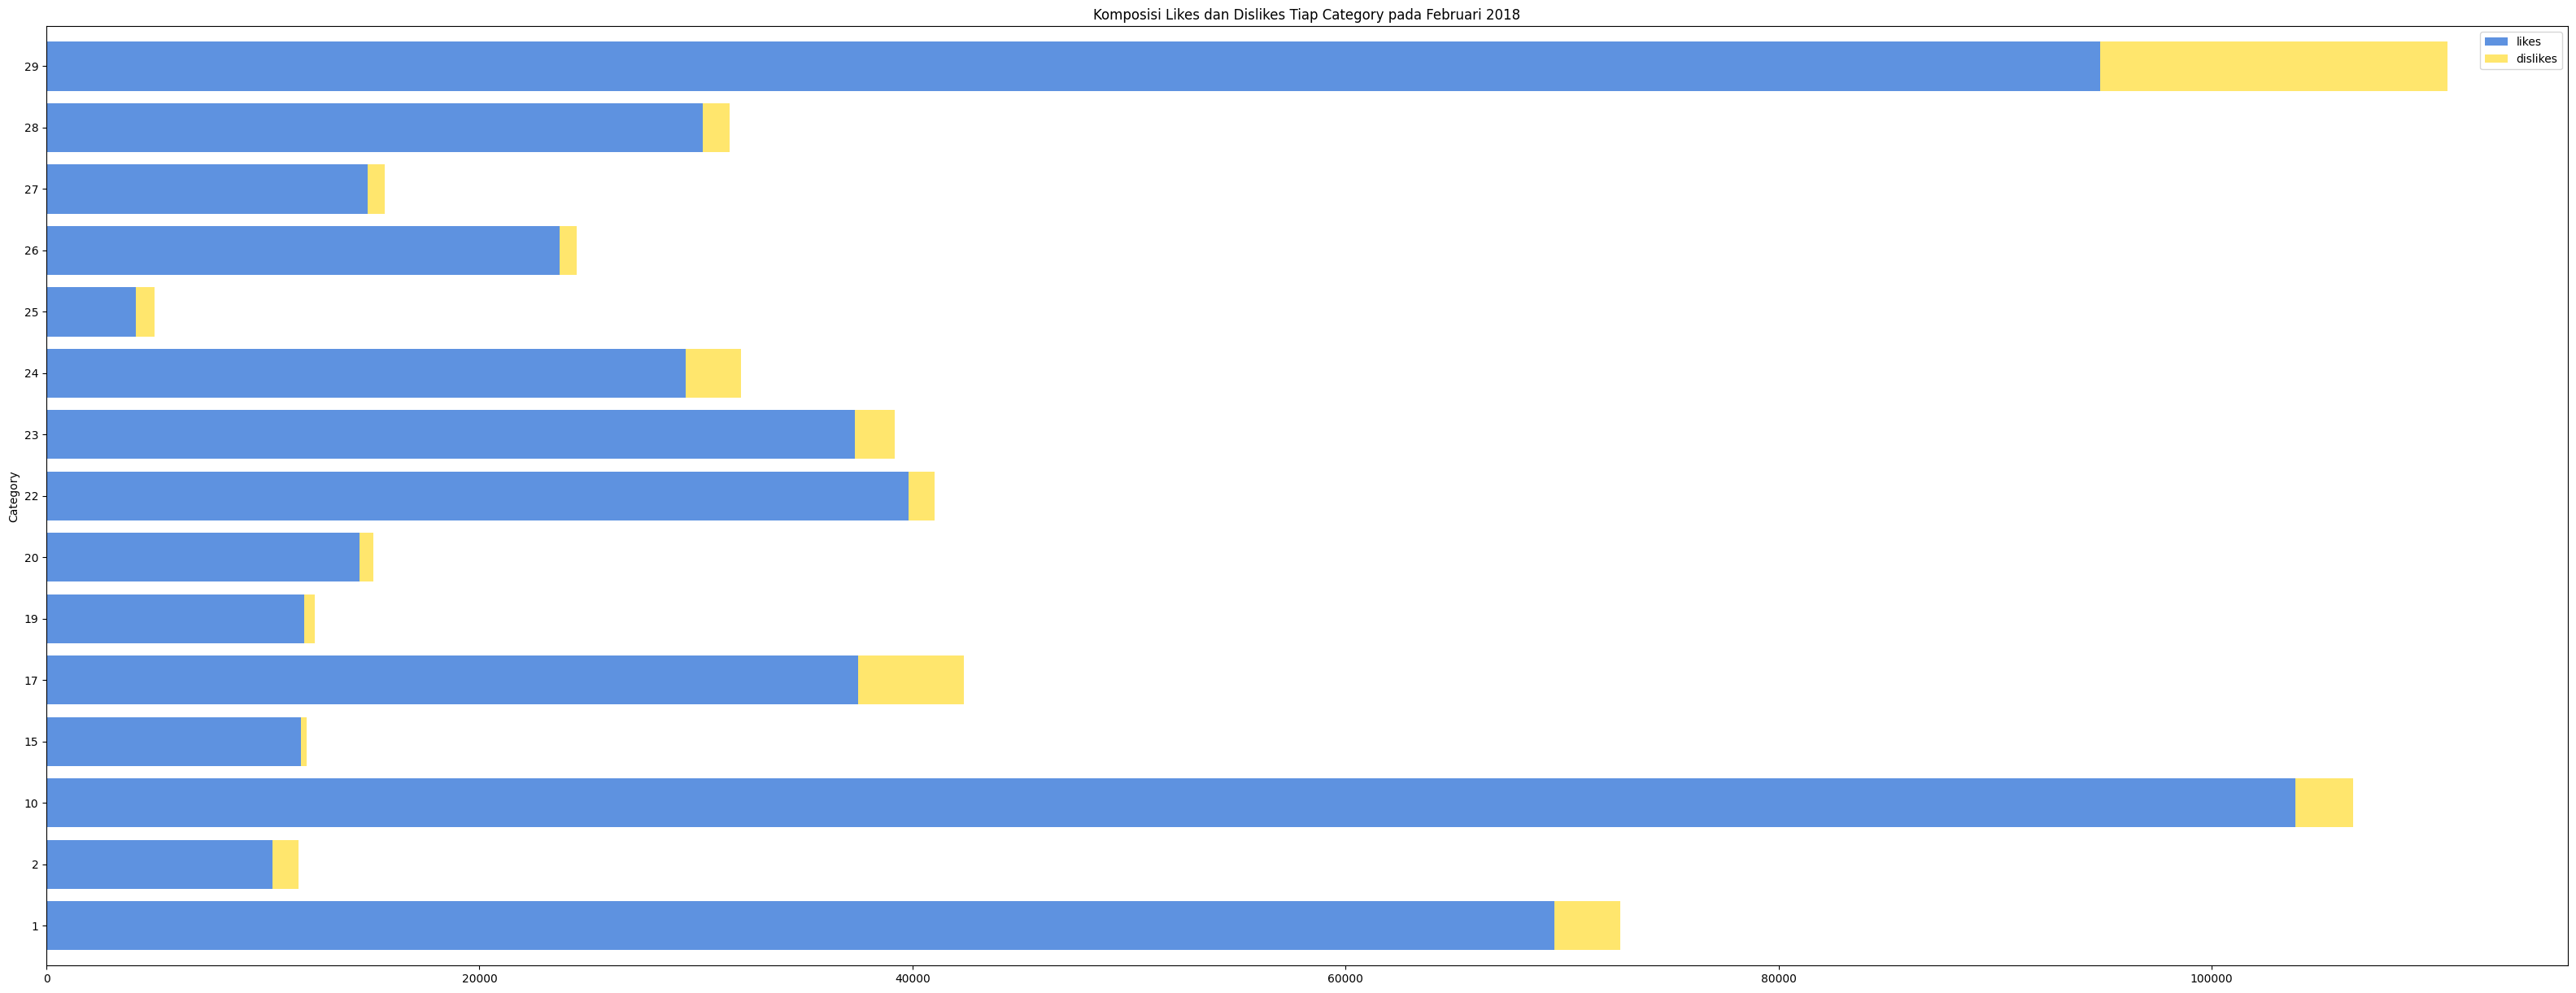

In [37]:
datafeb2018 = yt.loc[(yt["year"]==2018) & (yt["month"]==2)]             # Mencari data dengan kolom "publish_year" tahun 2018 dan bulan 2
df = datafeb2018.groupby(["category_id"])[["likes", "dislikes"]].mean()   # Mencari nilai rata-rata kolom "likes" dan "dislikes"
                                                                        # untuk tiap kelompok data berbeda pada kolom "category_id"
# Membuat visualisasi
df = df.plot(kind="barh", figsize=(40,15), width=0.8, color=["#5E92E0", "#FFE66D"],
             title="Komposisi Likes dan Dislikes Tiap Category pada Februari 2018", stacked=True)
df.set(ylabel="Category")
plt.show()

### Plotting Relationships

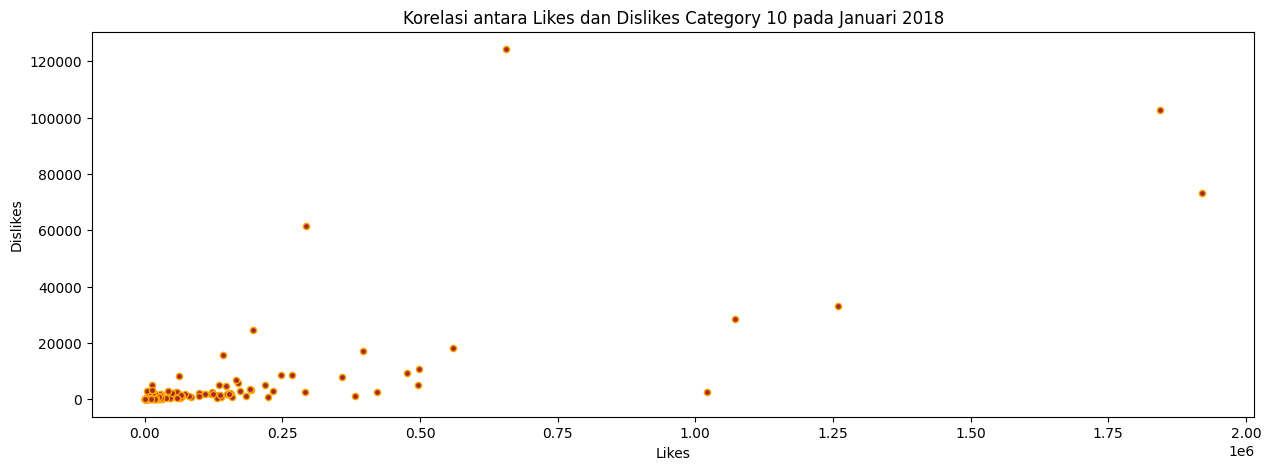

In [38]:
yt10 = yt.loc[(yt["year"]==2018) & (yt["month"]==1) & (yt["category_id"]==10)]    # Mencari data dengan kolom "publish_year" tahun 2018 dan bulan 1
                                                                                  # dan kolom "category_id" berisi 10
# Membuat visualisasi
df = yt10.plot(kind="scatter", x="likes", y="dislikes", color="brown", edgecolor="orange", figsize=(15,5),
                 title="Korelasi antara Likes dan Dislikes Category 10 pada Januari 2018")
df.set(xlabel="Likes", ylabel="Dislikes")
plt.show()

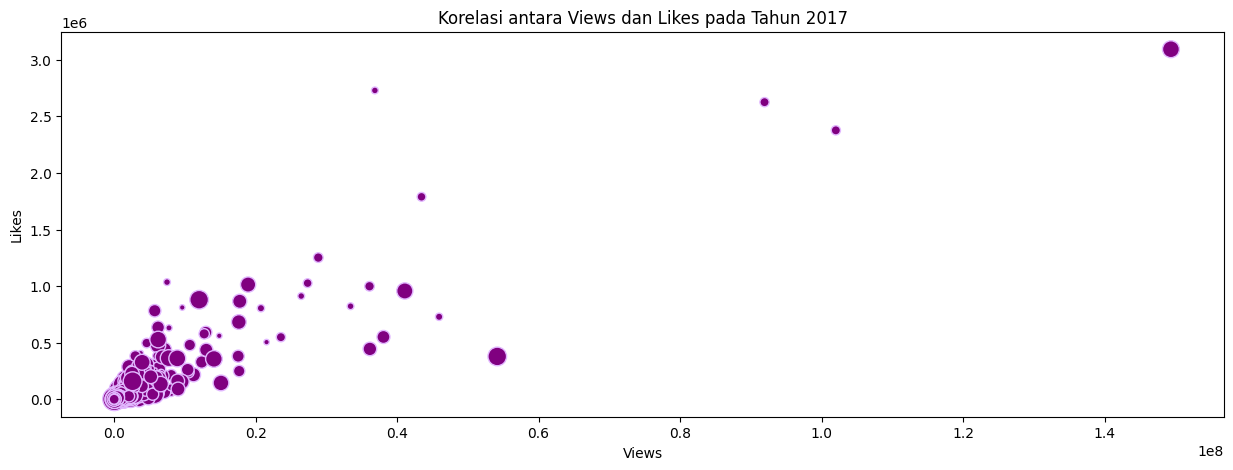

In [39]:
data2017 = yt.loc[(yt["year"]==2017)]   # Mencari data dengan kolom "publish_year" tahun 2017

# Membuat visualisasi
df = data2017.plot(kind="scatter", x="views", y="likes", sizes=4*(data2017["tags_count"]), color="purple",
                   edgecolor="#E2B8FF", figsize=(15,5), title="Korelasi antara Views dan Likes pada Tahun 2017")
df.set(xlabel="Views", ylabel="Likes")
plt.show()

# Korelasi

In [40]:
#menemukan coorelation coefecient
yt_now.corr()

views     likes  dislikes  comment_count  \
views                        1.000000  0.820951  0.528939       0.573385   
likes                        0.820951  1.000000  0.460294       0.712927   
dislikes                     0.528939  0.460294  1.000000       0.833591   
comment_count                0.573385  0.712927  0.833591       1.000000   
tag_appeared_in_title_count  0.024586  0.028875 -0.011708      -0.011338   
trend_day_count              0.190477  0.165076  0.048368       0.084763   
trend.publish.diff          -0.029170 -0.030236 -0.007770      -0.017414   
trend_tag_highest           -0.013075 -0.010162  0.019277       0.008993   
trend_tag_total             -0.021857 -0.033524  0.001761      -0.012426   
tags_count                   0.009490  0.000155  0.015123       0.008716   
subscriber                   0.265718  0.320504  0.129718       0.191212   

                             tag_appeared_in_title_count  trend_day_count  \
views                                           0.024586         0.190477   
likes                                           0.028875         0.165076   
dislikes                                       -0.011708         0.048368   
comment_count                                  -0.011338         0.084763   
tag_appeared_in_title_count                     1.000000        -0.007517   
trend_day_count                                -0.007517         1.000000   
trend.publish.diff                             -0.017186        -0.060814   
trend_tag_highest                               0.177373        -0.089643   
trend_tag_total                                 0.184761        -0.170191   
tags_count                                      0.452213        -0.054108   
subscriber                                      0.146813        -0.022432   

                             trend.publish.diff  trend_tag_highest  \
views                                 -0.029170          -0.013075   
likes                                 -0.030236          -0.010162   
dislikes                              -0.007770           0.019277   
comment_count                         -0.017414           0.008993   
tag_appeared_in_title_count           -0.017186           0.177373   
trend_day_count                       -0.060814          -0.089643   
trend.publish.diff                     1.000000          -0.061616   
trend_tag_highest                     -0.061616           1.000000   
trend_tag_total                       -0.061611           0.829698   
tags_count                            -0.084062           0.450280   
subscriber                            -0.075939           0.262213   

                             trend_tag_total  tags_count  subscriber  
views                              -0.021857    0.009490    0.265718  
likes                              -0.033524    0.000155    0.320504  
dislikes                            0.001761    0.015123    0.129718  
comment_count                      -0.012426    0.008716    0.191212  
tag_appeared_in_title_count         0.184761    0.452213    0.146813  
trend_day_count                    -0.170191   -0.054108   -0.022432  
trend.publish.diff                 -0.061611   -0.084062   -0.075939  
trend_tag_highest                   0.829698    0.450280    0.262213  
trend_tag_total                     1.000000    0.540879    0.325826  
tags_count                          0.540879    1.000000    0.248709  
subscriber                          0.325826    0.248709    1.000000

# Visualiasi korelasi

0.8209508219452931


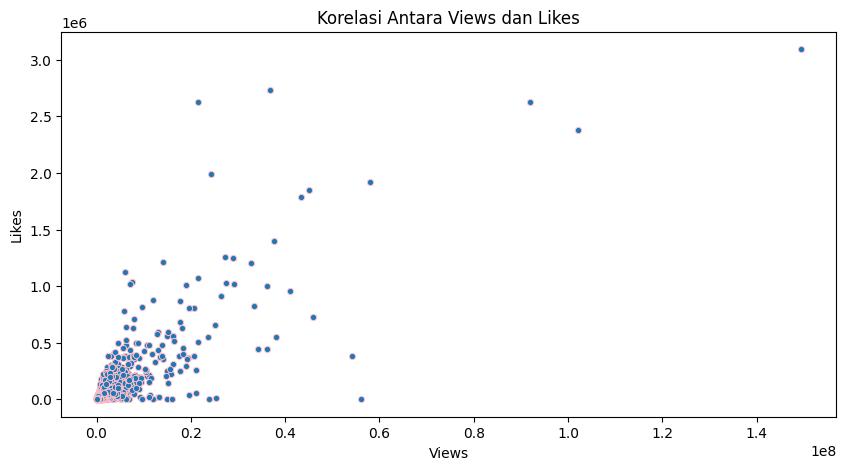

In [41]:
# Views - Likes
print(yt["views"].corr(yt["likes"]))
yt.plot(kind="scatter", x="views", y="likes", edgecolor="pink", linewidth=0.7, figsize=(10,5),
        title="Korelasi Antara Views dan Likes").set(xlabel="Views", ylabel="Likes")
plt.show()

0.528938803346496


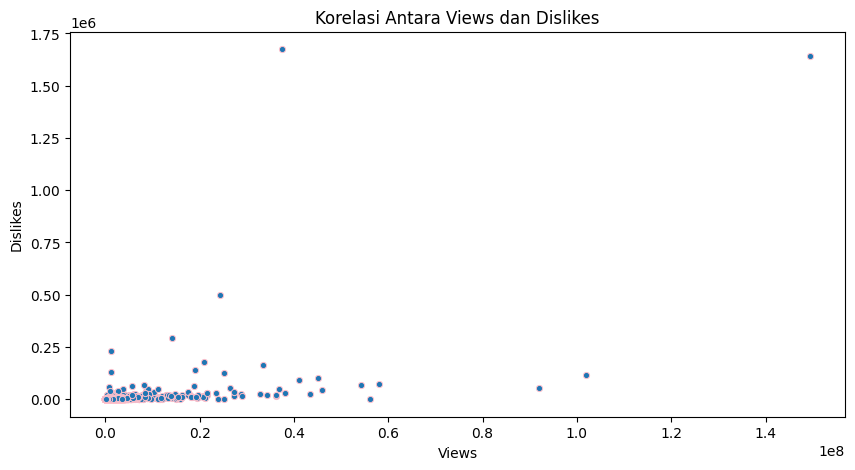

In [42]:
# Views - Dislikes
print(yt["views"].corr(yt["dislikes"]))
yt.plot(kind="scatter", x="views", y="dislikes", edgecolor="pink", linewidth=0.7, figsize=(10,5),
        title="Korelasi Antara Views dan Dislikes").set(xlabel="Views", ylabel="Dislikes")
plt.show()

0.5733847528912057


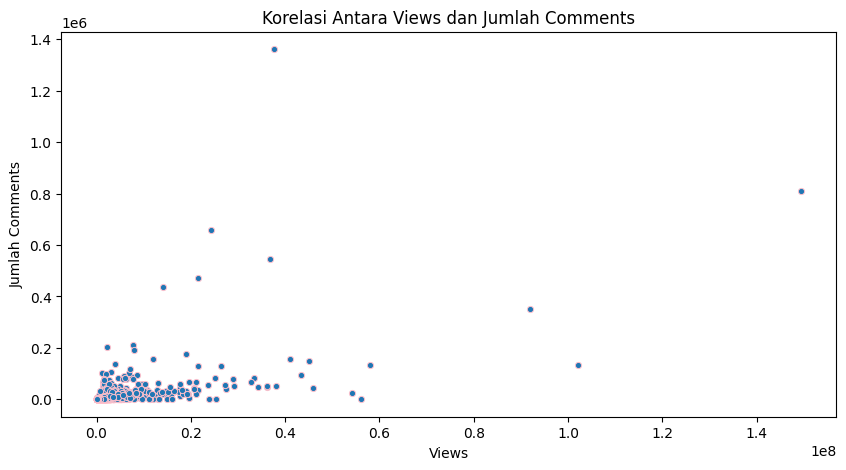

In [43]:
# Views - Comment_count
print(yt["views"].corr(yt["comment_count"]))
yt.plot(kind="scatter", x="views", y="comment_count", edgecolor="pink", linewidth=0.7, figsize=(10,5),
        title="Korelasi Antara Views dan Jumlah Comments").set(xlabel="Views", ylabel="Jumlah Comments")
plt.show()

0.02458608127124357


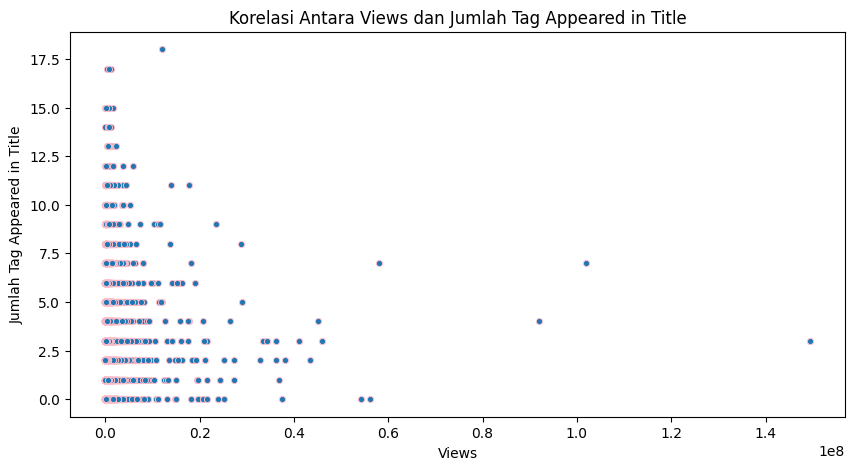

In [44]:
# Views - tag_appeared_in_title_count
print(yt["views"].corr(yt["tag_appeared_in_title_count"]))
yt.plot(kind="scatter", x="views", y="tag_appeared_in_title_count", edgecolor="pink", linewidth=0.7, figsize=(10,5),
        title="Korelasi Antara Views dan Jumlah Tag Appeared in Title").set(xlabel="Views", ylabel="Jumlah Tag Appeared in Title")
plt.show()

0.1904766183596002


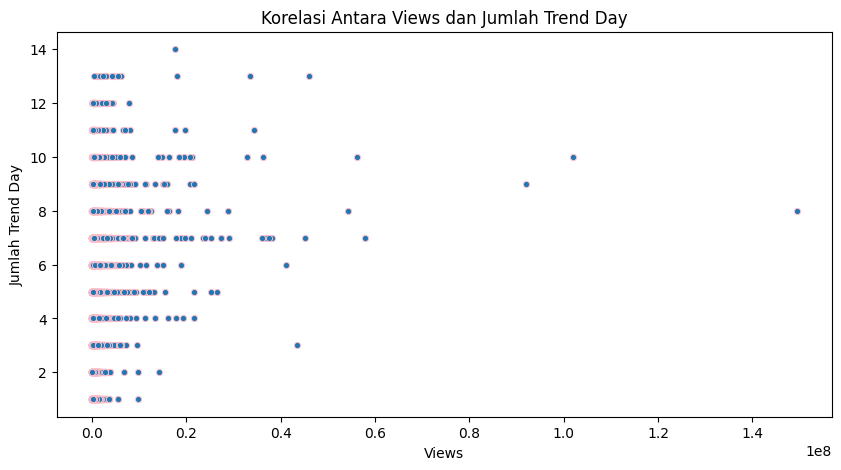

In [45]:
# Views - trend_day_count
print(yt["views"].corr(yt["trend_day_count"]))
yt.plot(kind="scatter", x="views", y="trend_day_count", edgecolor="pink", linewidth=0.7, figsize=(10,5),
        title="Korelasi Antara Views dan Jumlah Trend Day").set(xlabel="Views", ylabel="Jumlah Trend Day")
plt.show()

-0.02916961117246368


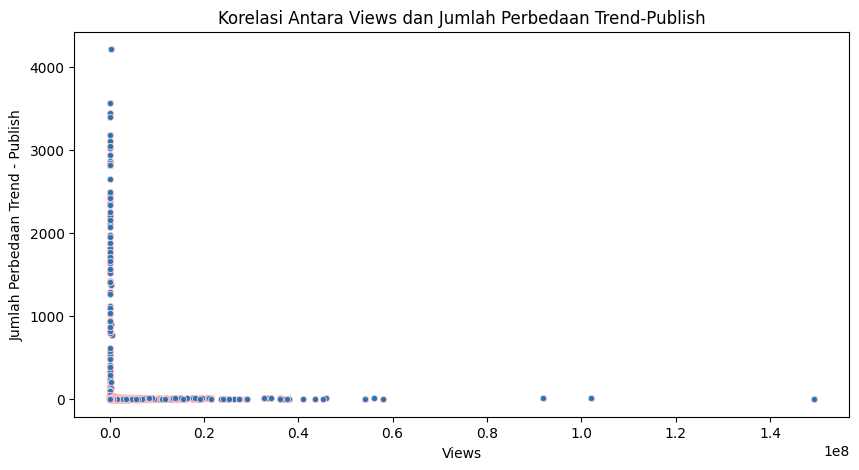

In [46]:
# Views - trend.publish.diff
print(yt_now["views"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x="views", y="trend.publish.diff", edgecolor="pink", linewidth=0.7, figsize=(10,5),
        title="Korelasi Antara Views dan Jumlah Perbedaan Trend-Publish").set(xlabel="Views", ylabel="Jumlah Perbedaan Trend - Publish")
plt.show()

-0.013074637947380341


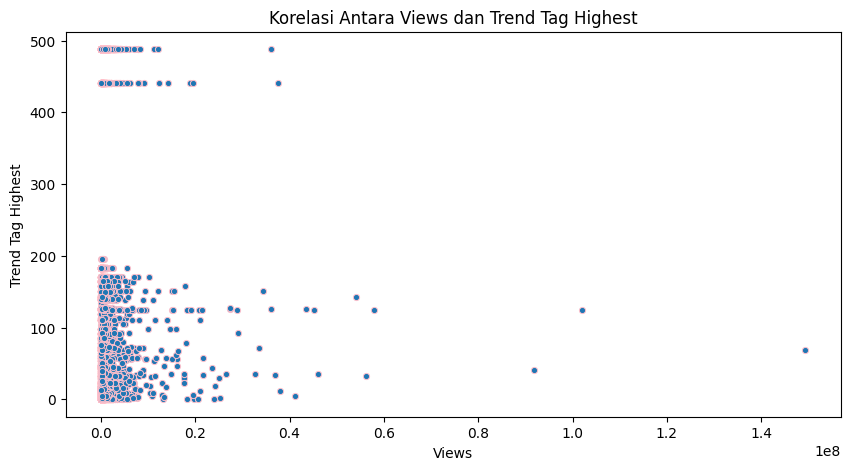

In [47]:
# Views - trend_tag_highest
print(yt["views"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x="views", y="trend_tag_highest", edgecolor="pink", linewidth=0.7, figsize=(10,5),
        title="Korelasi Antara Views dan Trend Tag Highest").set(xlabel="Views", ylabel="Trend Tag Highest")
plt.show()

-0.021856870376722088


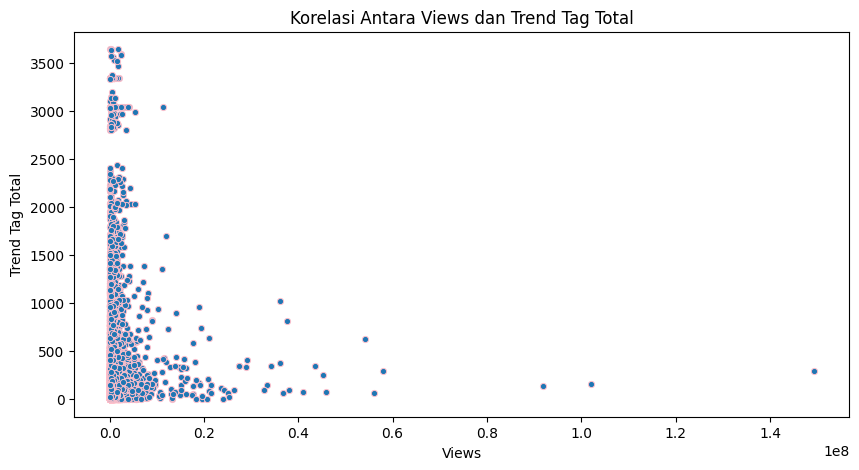

In [48]:
# Views - trend_tag_total
print(yt["views"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x="views", y="trend_tag_total", edgecolor="pink", linewidth=0.7, figsize=(10,5),
        title="Korelasi Antara Views dan Trend Tag Total").set(xlabel="Views", ylabel="Trend Tag Total")
plt.show()

0.009489903962272778


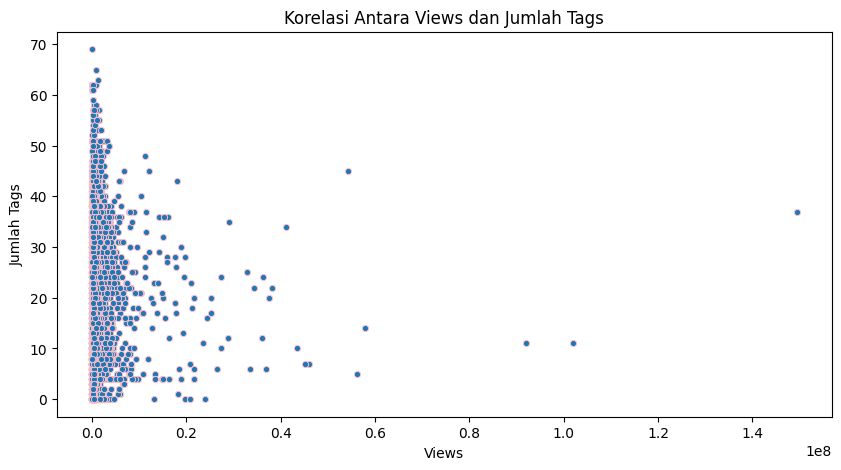

In [49]:
# Views - tags_count
print(yt["views"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x="views", y="tags_count", edgecolor="pink", linewidth=0.7, figsize=(10,5),
        title="Korelasi Antara Views dan Jumlah Tags").set(xlabel="Views", ylabel="Jumlah Tags")
plt.show()

0.2656739391637472


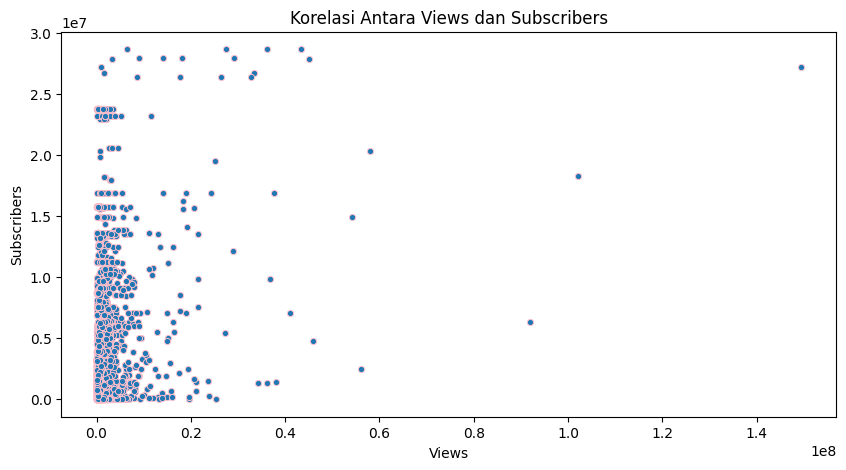

In [50]:
# Views – subscriber
print(yt["views"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x="views", y="subscriber", edgecolor="pink", linewidth=0.7, figsize=(10,5),
        title="Korelasi Antara Views dan Subscribers").set(xlabel="Views", ylabel="Subscribers")
plt.show()

0.460294220163892


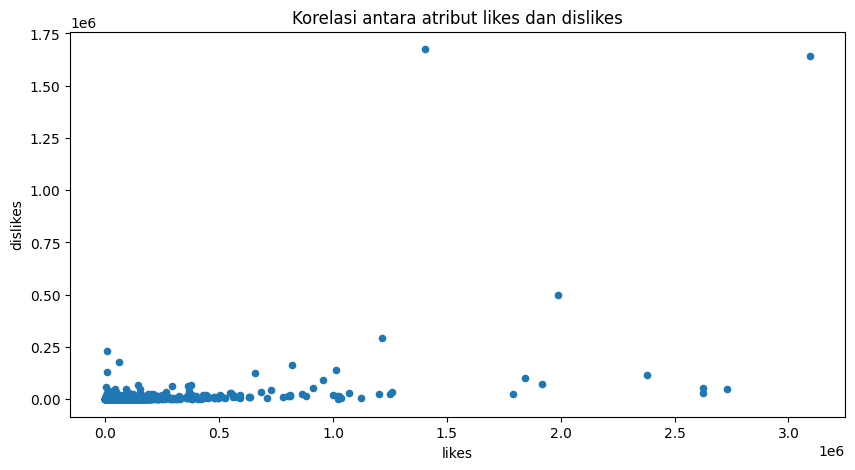

In [51]:
#Likes - Dislikes
print(yt["likes"].corr(yt["dislikes"]))
yt.plot(kind="scatter", x="likes", y="dislikes", title="Korelasi antara atribut likes dan dislikes", figsize=(10,5))
plt.show()

0.7129272157238951


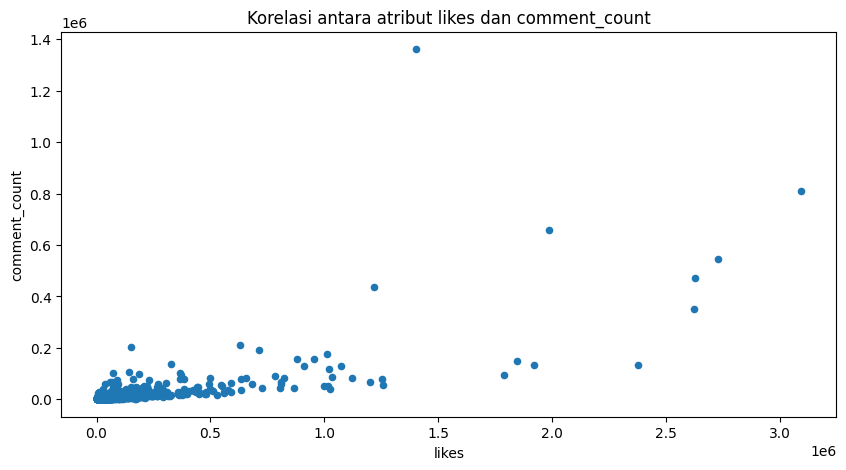

In [52]:
#Likes - comment_count
print(yt["likes"].corr(yt["comment_count"]))
yt.plot(kind="scatter", x = "likes", y = "comment_count", title="Korelasi antara atribut likes dan comment_count", figsize=(10,5))
plt.show()

0.02887524333461213


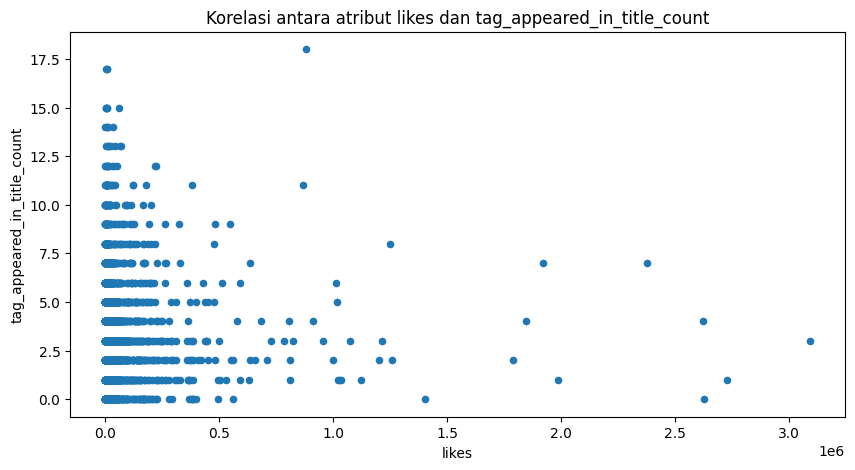

In [53]:
#Likes - tag_appeared_in_title_count
print(yt["likes"].corr(yt["tag_appeared_in_title_count"]))
yt.plot(kind="scatter", x = "likes", y = "tag_appeared_in_title_count", title="Korelasi antara atribut likes dan tag_appeared_in_title_count", figsize=(10,5))
plt.show()

0.16507587487322767


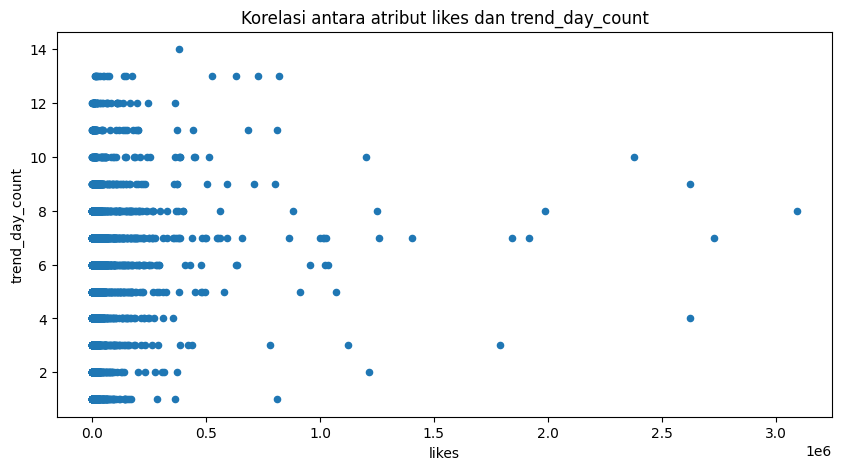

In [54]:
#Likes - trend_day_count
print(yt["likes"].corr(yt["trend_day_count"]))
yt.plot(kind="scatter", x = "likes", y = "trend_day_count", title="Korelasi antara atribut likes dan trend_day_count", figsize=(10,5))
plt.show()

-0.030236396603123033


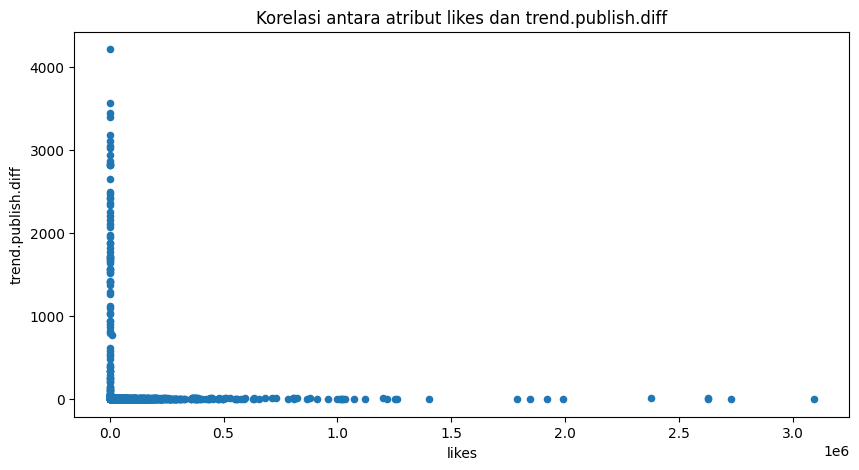

In [55]:
#Likes - trend.publish.diff
print(yt["likes"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x = "likes", y = "trend.publish.diff", title="Korelasi antara atribut likes dan trend.publish.diff", figsize=(10,5))
plt.show()

-0.010161861356980892


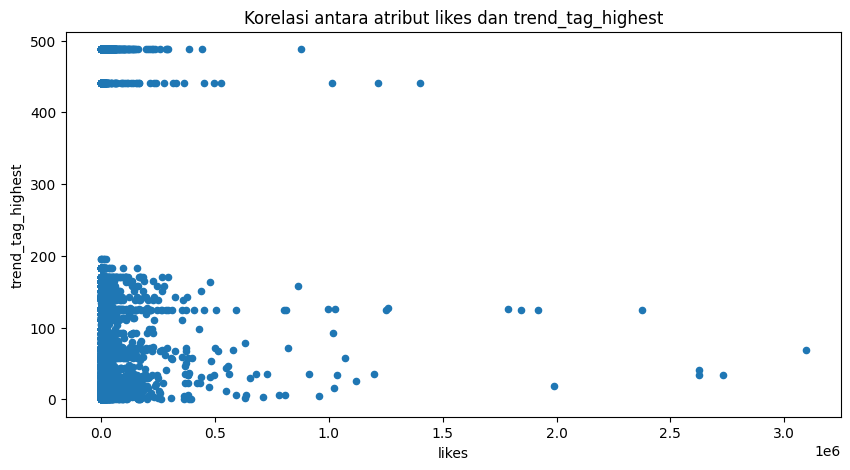

In [56]:
#Likes - trend_tag_highest
print(yt["likes"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "likes", y = "trend_tag_highest", title="Korelasi antara atribut likes dan trend_tag_highest", figsize=(10,5))
plt.show()

-0.03352366007455522


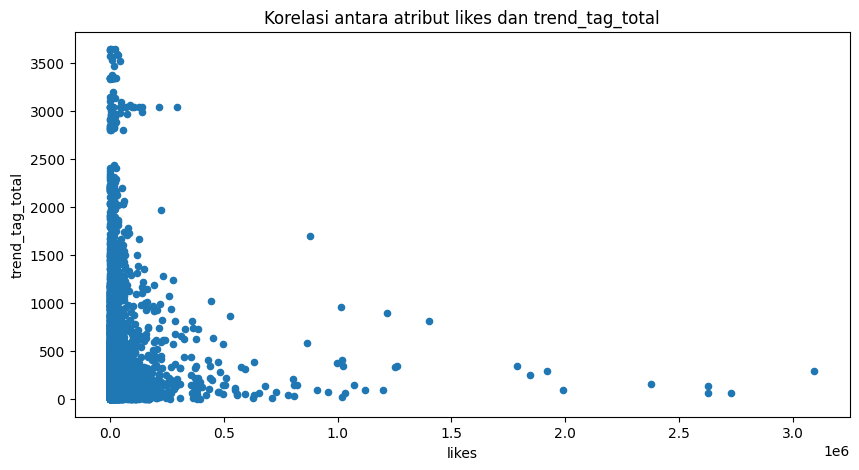

In [57]:
#Likes - trend_tag_total
print(yt["likes"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "likes", y = "trend_tag_total", title="Korelasi antara atribut likes dan trend_tag_total", figsize=(10,5))
plt.show()

0.00015514245964619368


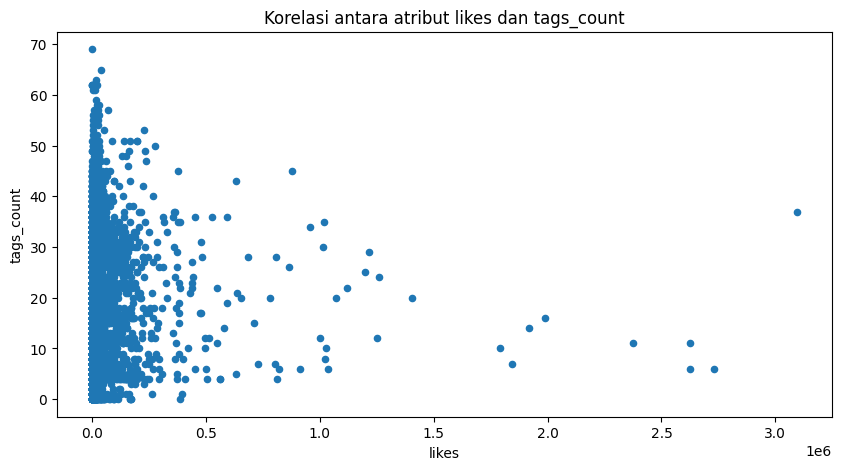

In [58]:
#Likes - tags_count
print(yt["likes"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "likes", y = "tags_count", title="Korelasi antara atribut likes dan tags_count", figsize=(10,5))
plt.show()

0.32045089547964173


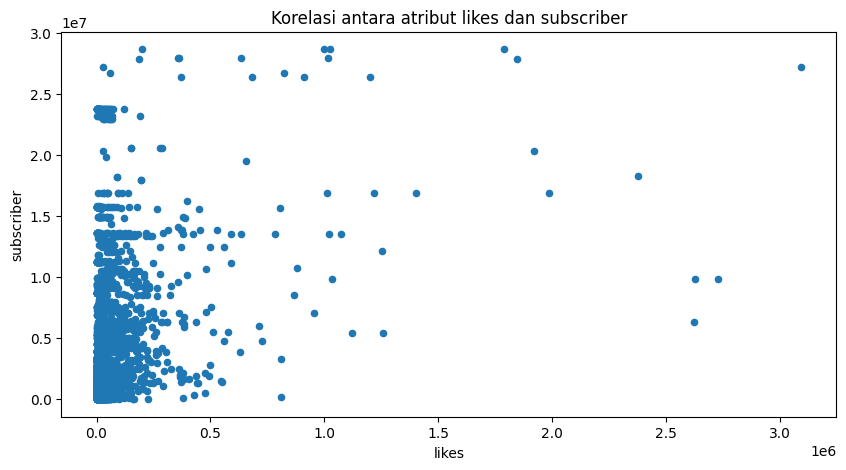

In [59]:
#Likes - subcriber
print(yt["likes"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "likes", y = "subscriber", title="Korelasi antara atribut likes dan subscriber", figsize=(10,5))
plt.show()

0.8335906958211329


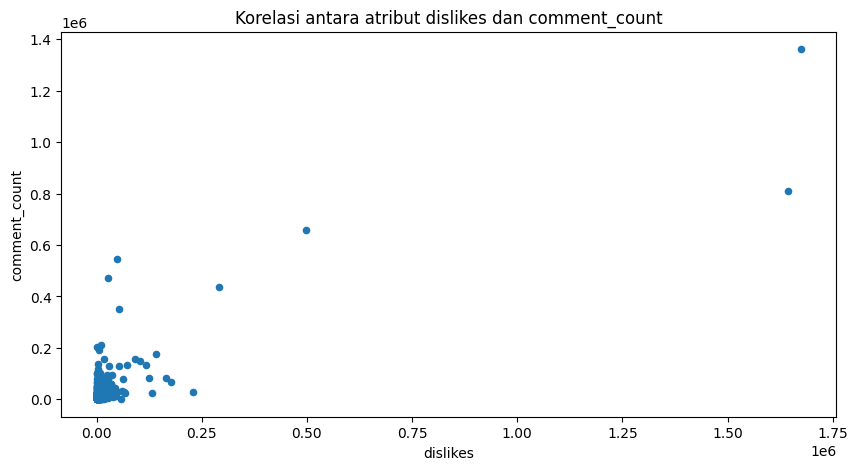

In [60]:
#Dislikes - comment_count
print(yt["dislikes"].corr(yt["comment_count"]))
yt.plot(kind="scatter", x = "dislikes", y = "comment_count", title="Korelasi antara atribut dislikes dan comment_count", figsize=(10,5))
plt.show()

-0.011707670488627303


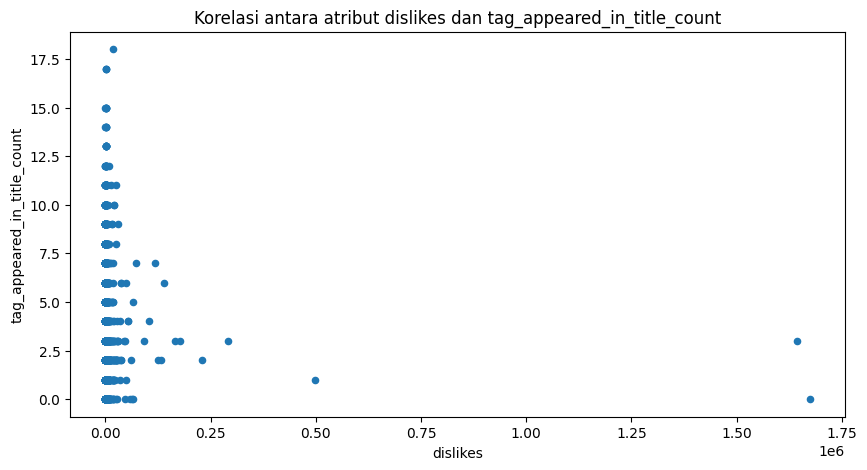

In [61]:
#Dislikes - tag_appeared_in_title_count
print(yt["dislikes"].corr(yt["tag_appeared_in_title_count"]))
yt.plot(kind="scatter", x = "dislikes", y = "tag_appeared_in_title_count", title="Korelasi antara atribut dislikes dan tag_appeared_in_title_count", figsize=(10,5))
plt.show()

0.04836780504905265


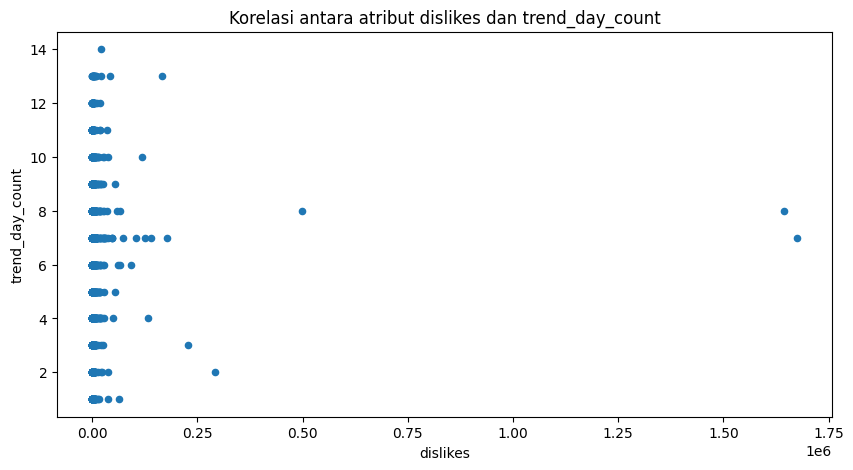

In [62]:
#Dislikes - trend_day_count
print(yt["dislikes"].corr(yt["trend_day_count"]))
yt.plot(kind="scatter", x = "dislikes", y = "trend_day_count", title="Korelasi antara atribut dislikes dan trend_day_count", figsize=(10,5))
plt.show()

-0.007770347901677333


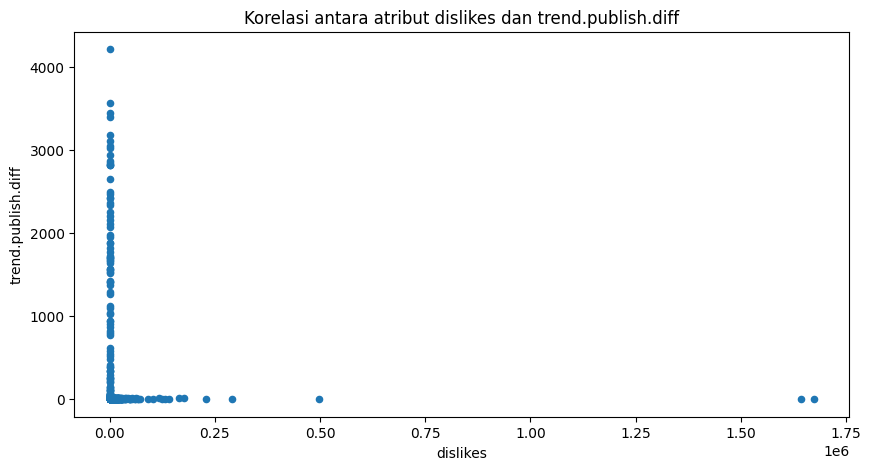

In [63]:
#Dislikes - trend.publish.diff
print(yt["dislikes"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x = "dislikes", y = "trend.publish.diff", title="Korelasi antara atribut dislikes dan trend.publish.diff", figsize=(10,5))
plt.show()

0.019277279062212493


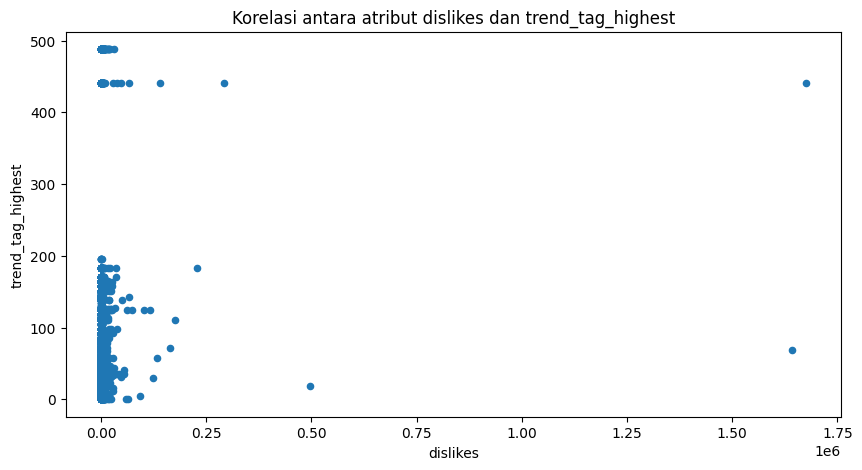

In [64]:
#Dislikes - trend_tag_highest
print(yt["dislikes"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "dislikes", y = "trend_tag_highest", title="Korelasi antara atribut dislikes dan trend_tag_highest", figsize=(10,5))
plt.show()

0.0017613003871175805


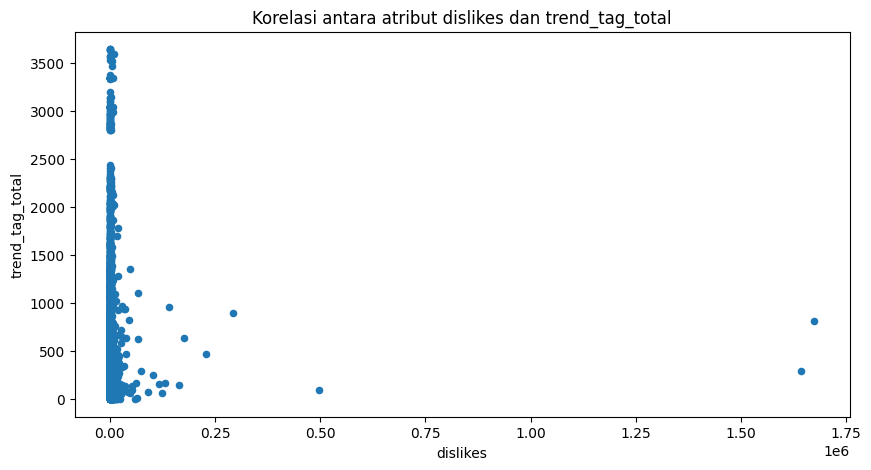

In [65]:
#Dislikes - trend_tag_total
print(yt["dislikes"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "dislikes", y = "trend_tag_total", title="Korelasi antara atribut dislikes dan trend_tag_total", figsize=(10,5))
plt.show()

0.015123274085789631


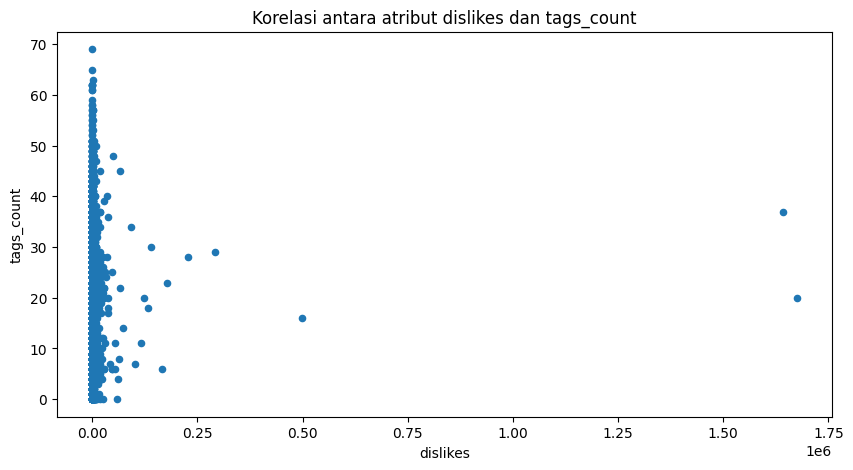

In [66]:
#Dislikes - tags_count
print(yt["dislikes"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "dislikes", y = "tags_count", title="Korelasi antara atribut dislikes dan tags_count", figsize=(10,5))
plt.show()

0.1297173266868582


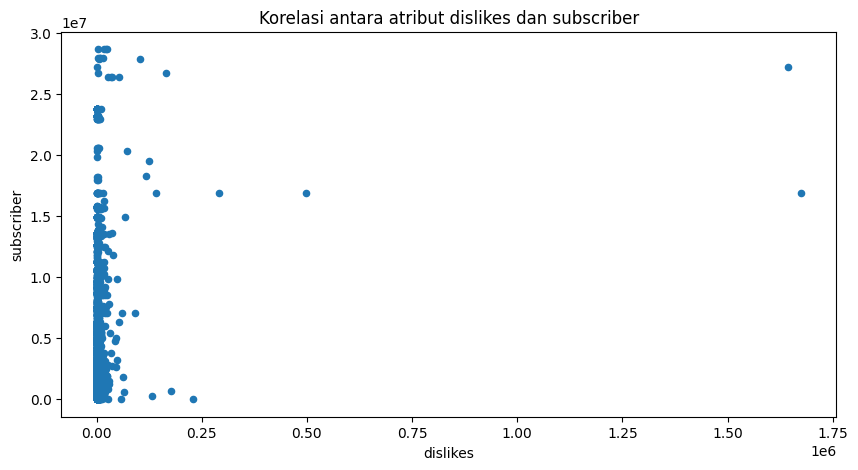

In [67]:
#Dislikes - subscriber
print(yt["dislikes"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "dislikes", y = "subscriber", title="Korelasi antara atribut dislikes dan subscriber", figsize=(10,5))
plt.show()

-0.011337660131507025


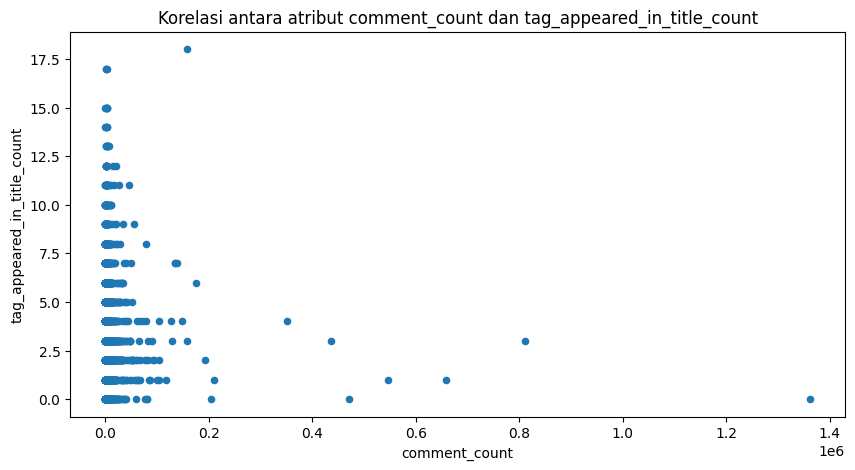

In [68]:
#Comment_count - tag_appeared_in_title_count
print(yt["comment_count"].corr(yt["tag_appeared_in_title_count"]))
yt.plot(kind="scatter", x = "comment_count", y = "tag_appeared_in_title_count", title="Korelasi antara atribut comment_count dan tag_appeared_in_title_count", figsize=(10,5))
plt.show()

0.08476341102740191


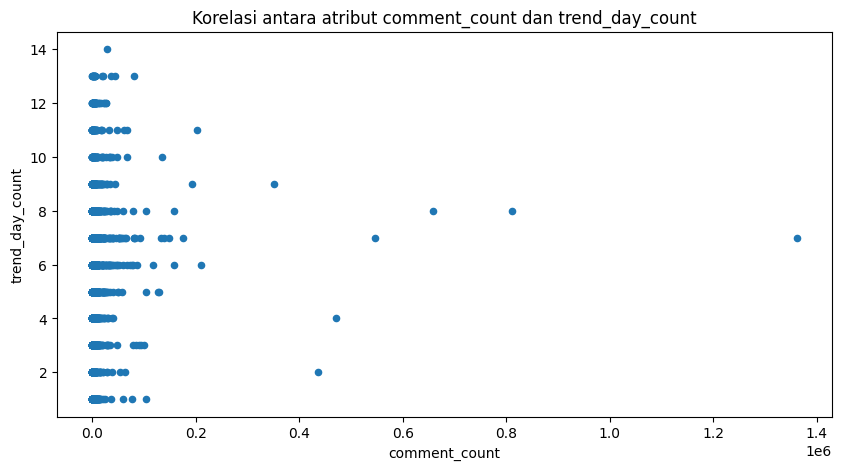

In [69]:
#Comment_count - trend_day_count
print(yt["comment_count"].corr(yt["trend_day_count"]))
yt.plot(kind="scatter", x = "comment_count", y = "trend_day_count", title="Korelasi antara atribut comment_count dan trend_day_count", figsize=(10,5))
plt.show()

-0.017414134328996498


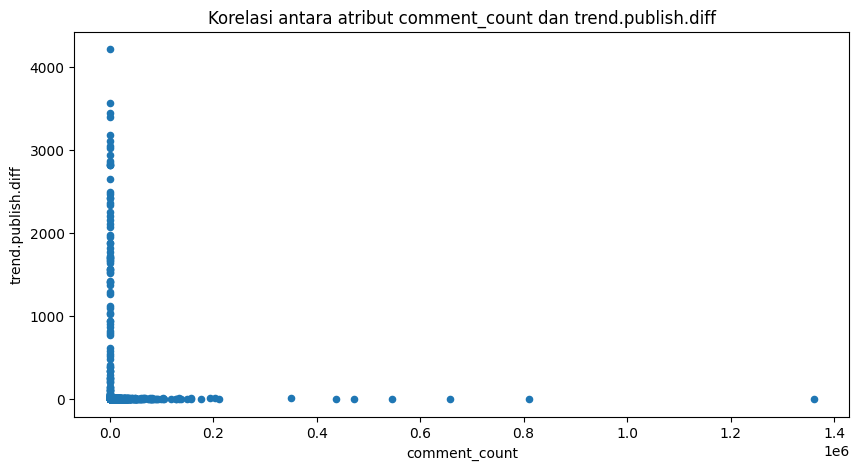

In [70]:
#Comment_count - trend.publish.diff
print(yt["comment_count"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x = "comment_count", y = "trend.publish.diff", title="Korelasi antara atribut comment_count dan trend.publish.diff", figsize=(10,5))
plt.show()

0.008992628047822939


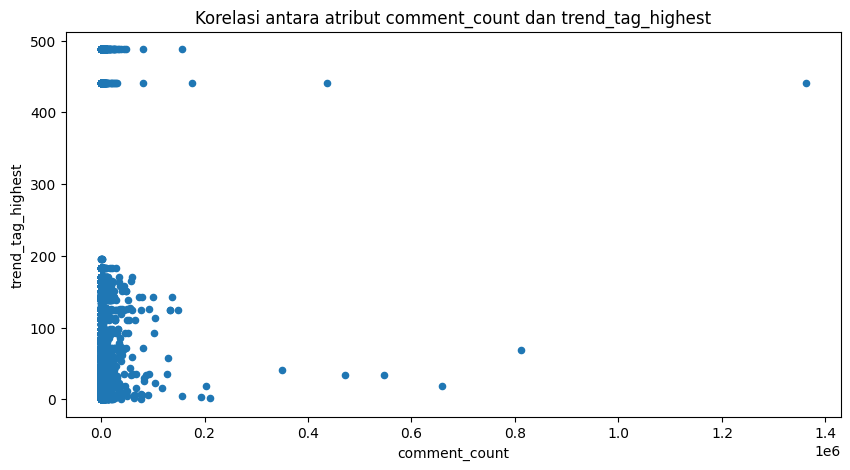

In [71]:
#Comment_count - trend_tag_highest
print(yt["comment_count"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "comment_count", y = "trend_tag_highest", title="Korelasi antara atribut comment_count dan trend_tag_highest", figsize=(10,5))
plt.show()

-0.012425939379166232


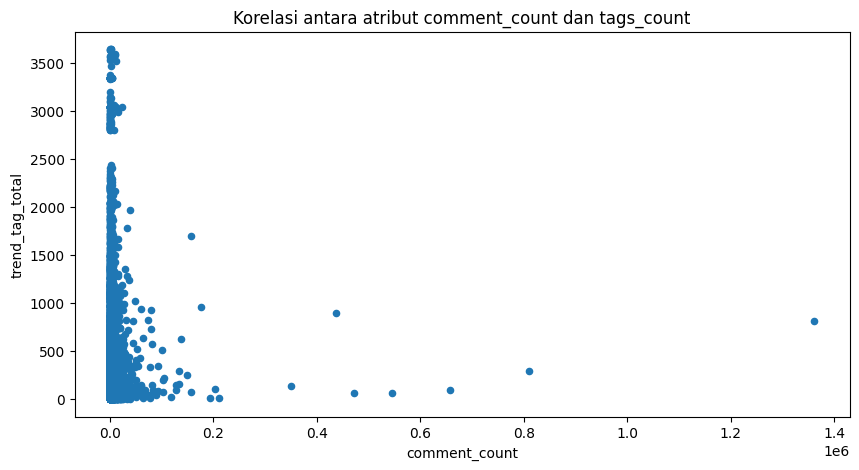

In [72]:
#Comment_count - trend_tag_total
print(yt["comment_count"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "comment_count", y = "trend_tag_total", title="Korelasi antara atribut comment_count dan tags_count", figsize=(10,5))
plt.show()

0.00871642194976111


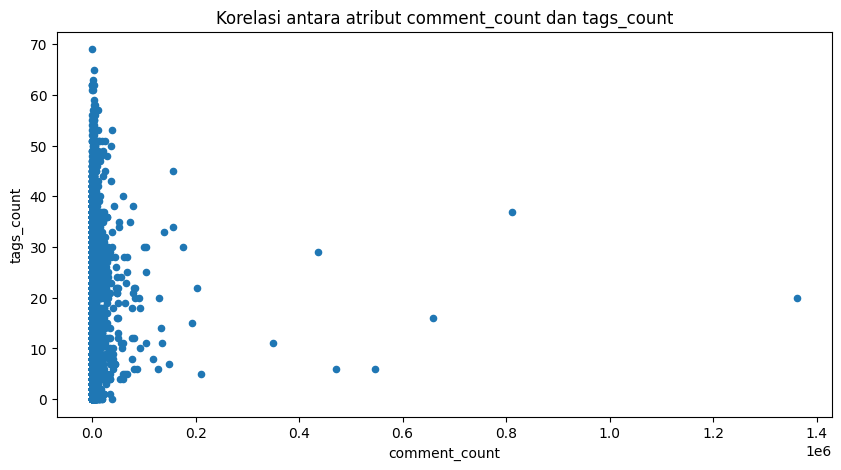

In [73]:
#Comment_count - tags_count
print(yt["comment_count"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "comment_count", y = "tags_count", title="Korelasi antara atribut comment_count dan tags_count", figsize=(10,5))
plt.show()

0.19120251681918987


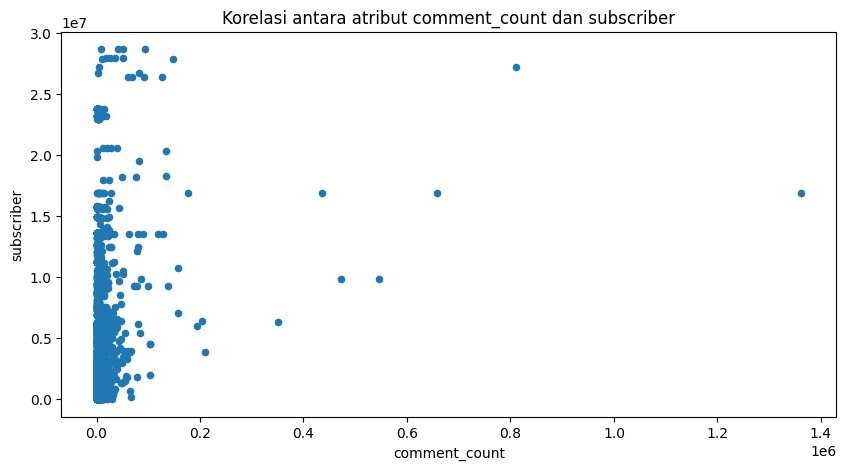

In [74]:
#Comment_count - subscriber
print(yt["comment_count"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "comment_count", y = "subscriber", title="Korelasi antara atribut comment_count dan subscriber", figsize=(10,5))
plt.show()

-0.0075165728711719835


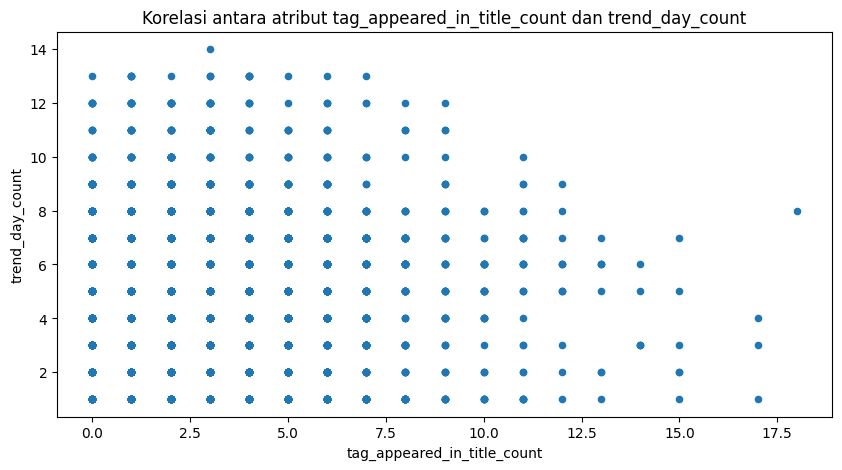

In [75]:
#tag_appeared_in_title_count - trend_day_count
print(yt["tag_appeared_in_title_count"].corr(yt["trend_day_count"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "trend_day_count", title="Korelasi antara atribut tag_appeared_in_title_count dan trend_day_count", figsize=(10,5))
plt.show()

-0.017186215728311492


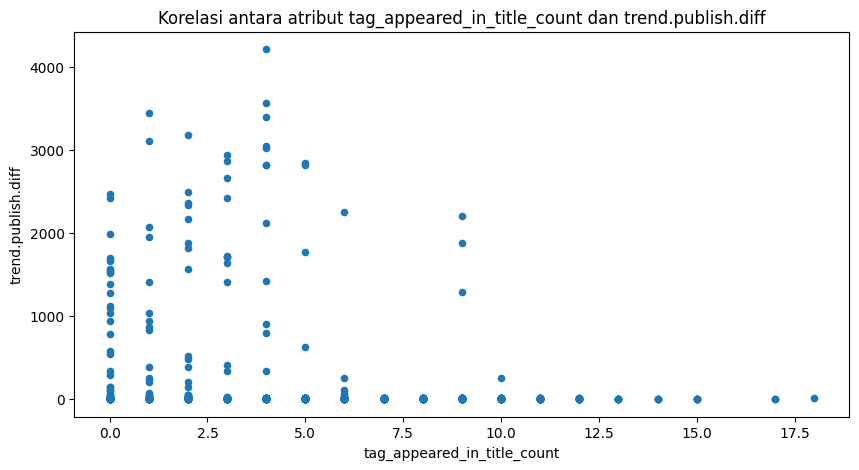

In [76]:
#tag_appeared_in_title_count - trend.publish.diff
print(yt["tag_appeared_in_title_count"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "trend.publish.diff", title="Korelasi antara atribut tag_appeared_in_title_count dan trend.publish.diff", figsize=(10,5))
plt.show()

0.17737304961729003


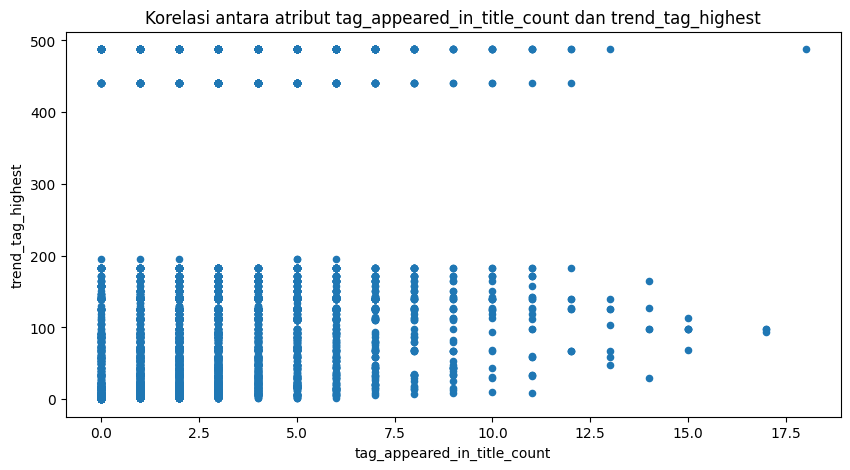

In [77]:
#tag_appeared_in_title_count - trend_tag_highest
print(yt["tag_appeared_in_title_count"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "trend_tag_highest", title="Korelasi antara atribut tag_appeared_in_title_count dan trend_tag_highest", figsize=(10,5))
plt.show()

0.18476088332405455


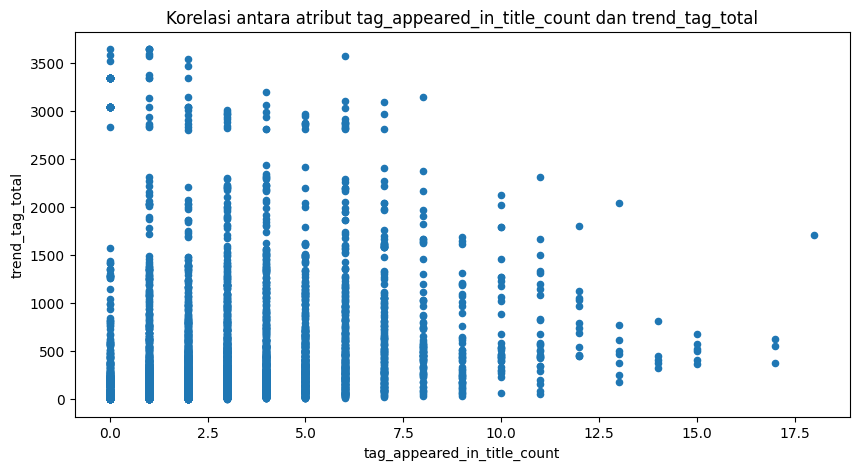

In [78]:
#tag_appeared_in_title_count - trend_tag_total
print(yt["tag_appeared_in_title_count"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "trend_tag_total", title="Korelasi antara atribut tag_appeared_in_title_count dan trend_tag_total", figsize=(10,5))
plt.show()

0.45221259877450876


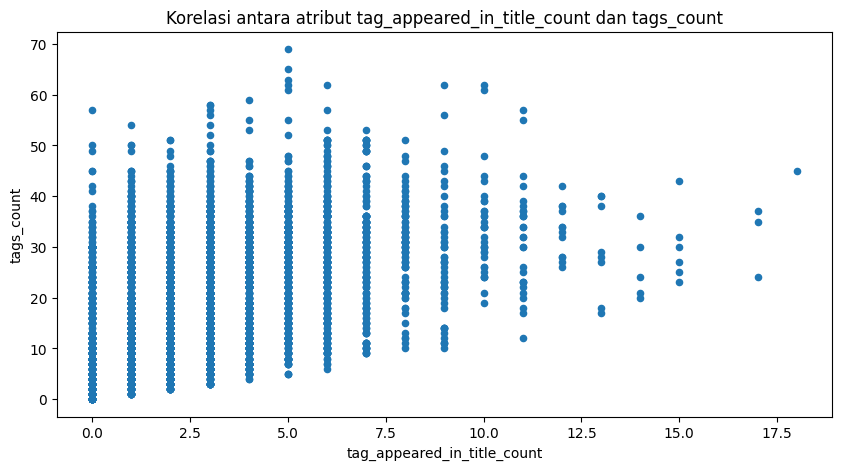

In [79]:
#tag_appeared_in_title_count - tags_count
print(yt["tag_appeared_in_title_count"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "tags_count", title="Korelasi antara atribut tag_appeared_in_title_count dan tags_count", figsize=(10,5))
plt.show()

0.14636952477511622


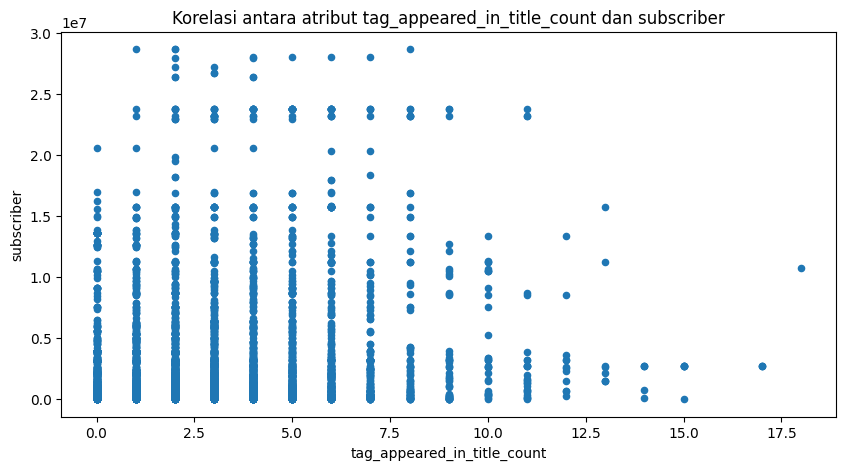

In [80]:
#tag_appeared_in_title_count - subscriber
print(yt["tag_appeared_in_title_count"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "tag_appeared_in_title_count", y = "subscriber", title="Korelasi antara atribut tag_appeared_in_title_count dan subscriber", figsize=(10,5))
plt.show()

-0.06081365640230055


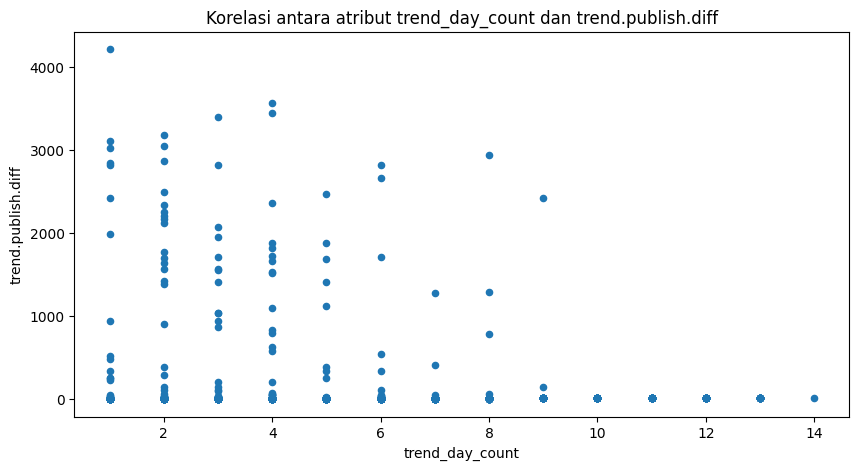

In [81]:
#trend_day_count - trend.publish.diff
print(yt["trend_day_count"].corr(yt["trend.publish.diff"]))
yt.plot(kind="scatter", x = "trend_day_count", y = "trend.publish.diff", title="Korelasi antara atribut trend_day_count dan trend.publish.diff", figsize=(10,5))
plt.show()

-0.08964303631915672


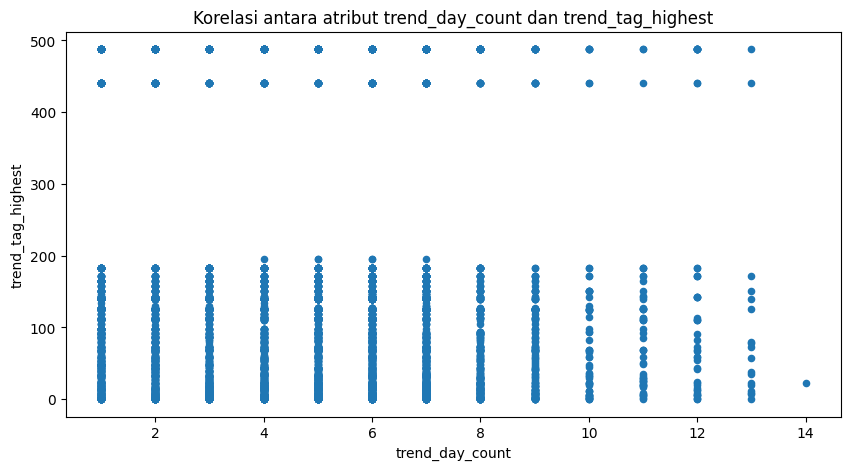

In [82]:
#trend_day_count - trend_tag_highest
print(yt["trend_day_count"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "trend_day_count", y = "trend_tag_highest", title="Korelasi antara atribut trend_day_count dan trend_tag_highest", figsize=(10,5))
plt.show()

-0.17019102809684217


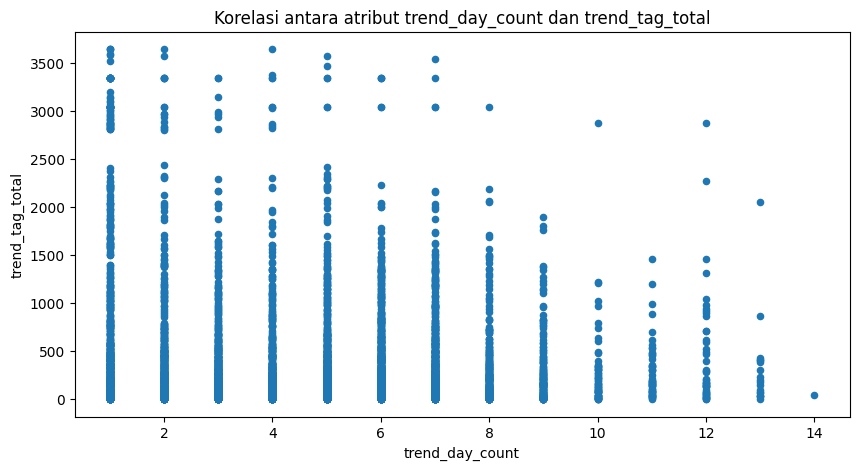

In [83]:
#trend_day_count - trend_tag_total
print(yt["trend_day_count"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "trend_day_count", y = "trend_tag_total", title="Korelasi antara atribut trend_day_count dan trend_tag_total", figsize=(10,5))
plt.show()

-0.05410812763602234


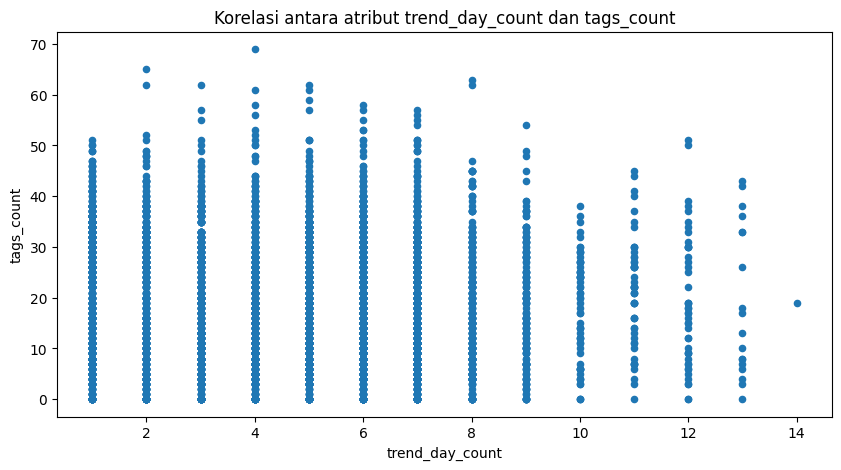

In [84]:
#trend_day_count - tags_count
print(yt["trend_day_count"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "trend_day_count", y = "tags_count", title="Korelasi antara atribut trend_day_count dan tags_count", figsize=(10,5))
plt.show()

-0.022363037579592016


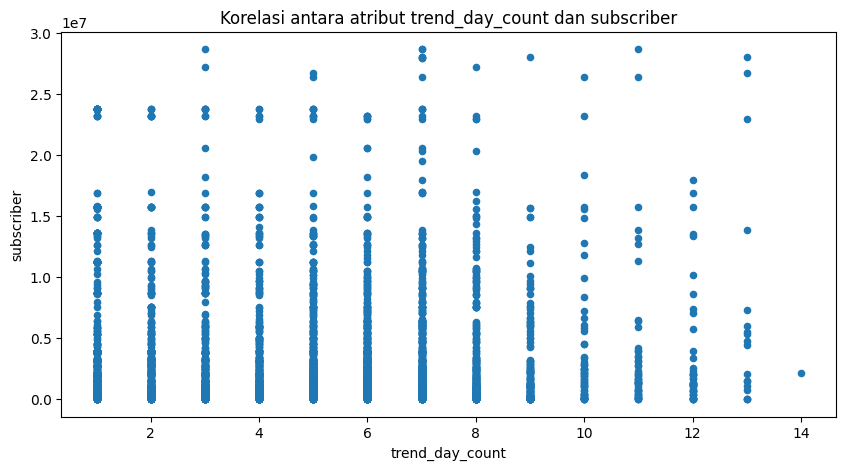

In [85]:
#trend_day_count - subscriber
print(yt["trend_day_count"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "trend_day_count", y = "subscriber", title="Korelasi antara atribut trend_day_count dan subscriber", figsize=(10,5))
plt.show()

-0.061616358306291086


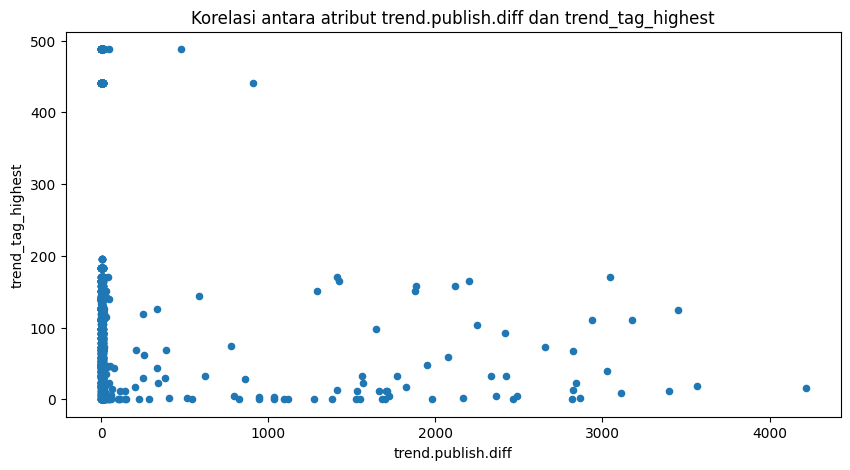

In [86]:
#trend.publish.diff - trend_tag_highest
print(yt["trend.publish.diff"].corr(yt["trend_tag_highest"]))
yt.plot(kind="scatter", x = "trend.publish.diff", y = "trend_tag_highest", title="Korelasi antara atribut trend.publish.diff dan trend_tag_highest", figsize=(10,5))
plt.show()

-0.06161084145986983


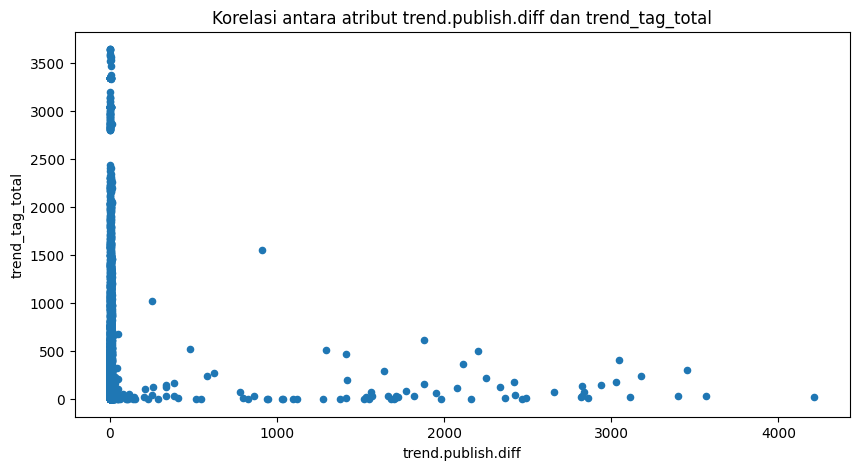

In [87]:
#trend.publish.diff - trend_tag_total
print(yt["trend.publish.diff"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "trend.publish.diff", y = "trend_tag_total", title="Korelasi antara atribut trend.publish.diff dan trend_tag_total", figsize=(10,5))
plt.show()

-0.08406194754310709


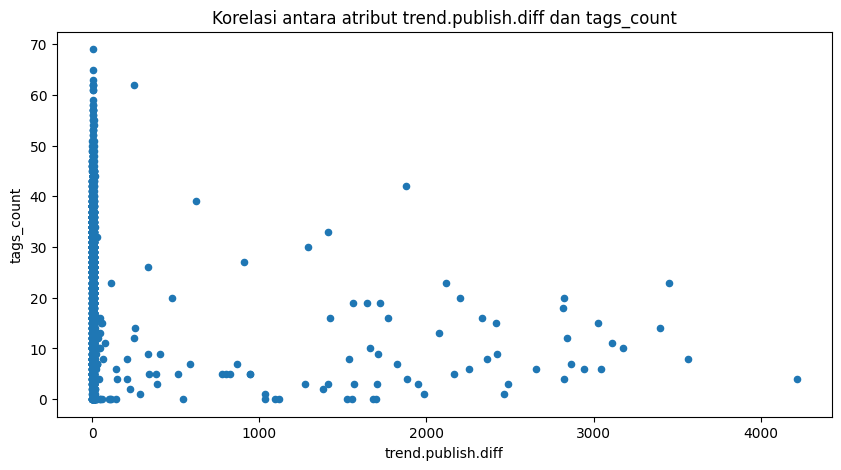

In [88]:
#trend.publish.diff - tags_count
print(yt["trend.publish.diff"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "trend.publish.diff", y = "tags_count", title="Korelasi antara atribut trend.publish.diff dan tags_count", figsize=(10,5))
plt.show()

-0.07593672409181426


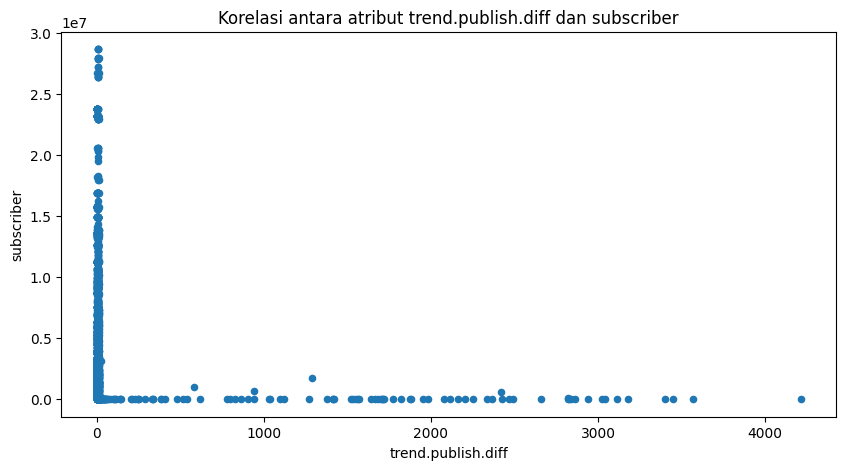

In [89]:
#trend.publish.diff - subscriber
print(yt["trend.publish.diff"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "trend.publish.diff", y = "subscriber", title="Korelasi antara atribut trend.publish.diff dan subscriber", figsize=(10,5))
plt.show()

0.8296977939450286


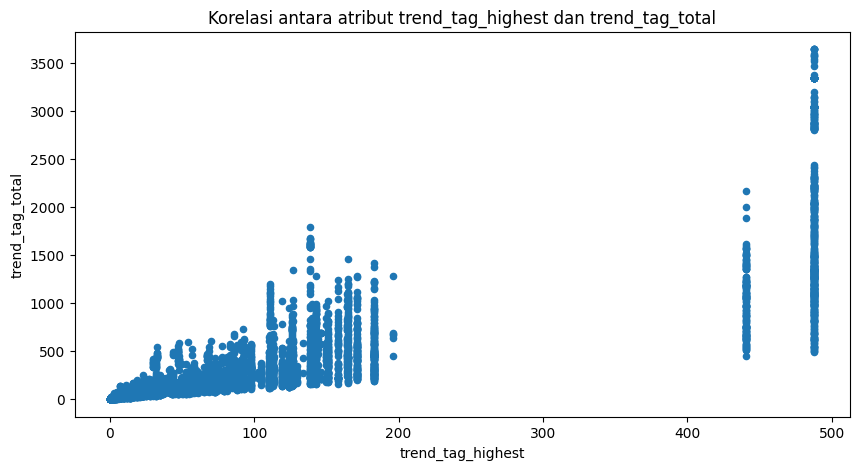

In [90]:
#trend_tag_highest - trend_tag_total
print(yt["trend_tag_highest"].corr(yt["trend_tag_total"]))
yt.plot(kind="scatter", x = "trend_tag_highest", y = "trend_tag_total", title="Korelasi antara atribut trend_tag_highest dan trend_tag_total", figsize=(10,5))
plt.show()

0.45028019845991285


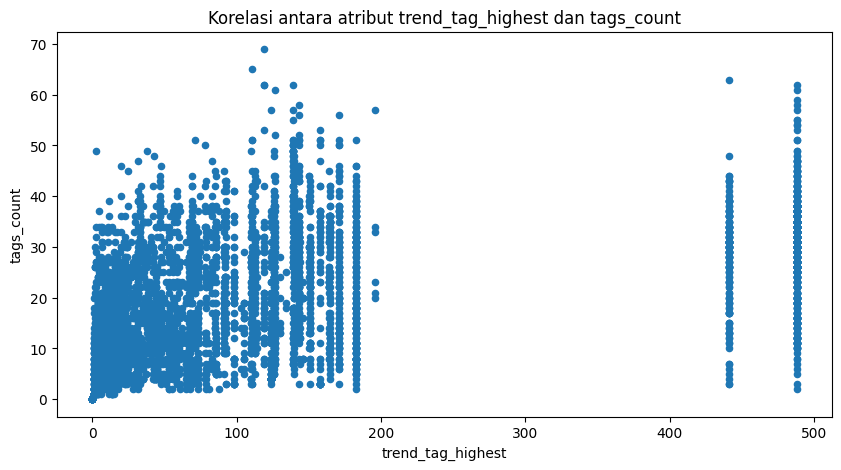

In [91]:
#trend_tag_highest - tags_count
print(yt["trend_tag_highest"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "trend_tag_highest", y = "tags_count", title="Korelasi antara atribut trend_tag_highest dan tags_count", figsize=(10,5))
plt.show()

0.2618669375521857


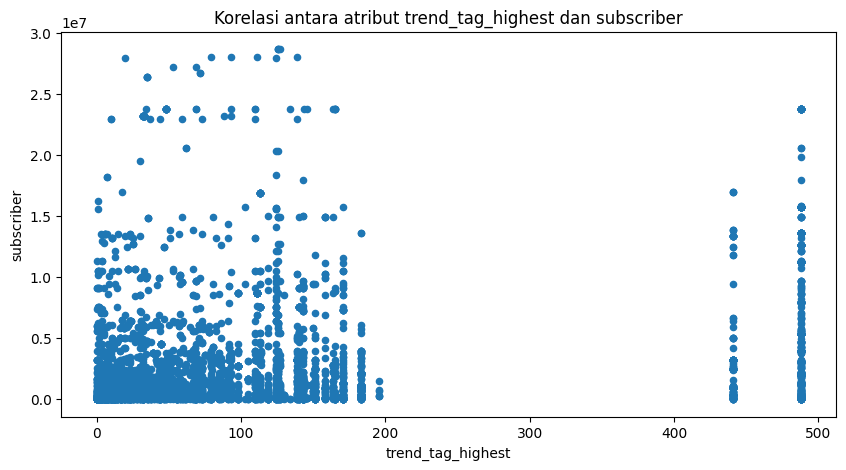

In [92]:
#trend_tag_highest - subscriber
print(yt["trend_tag_highest"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "trend_tag_highest", y = "subscriber", title="Korelasi antara atribut trend_tag_highest dan subscriber", figsize=(10,5))
plt.show()

0.5408787066869215


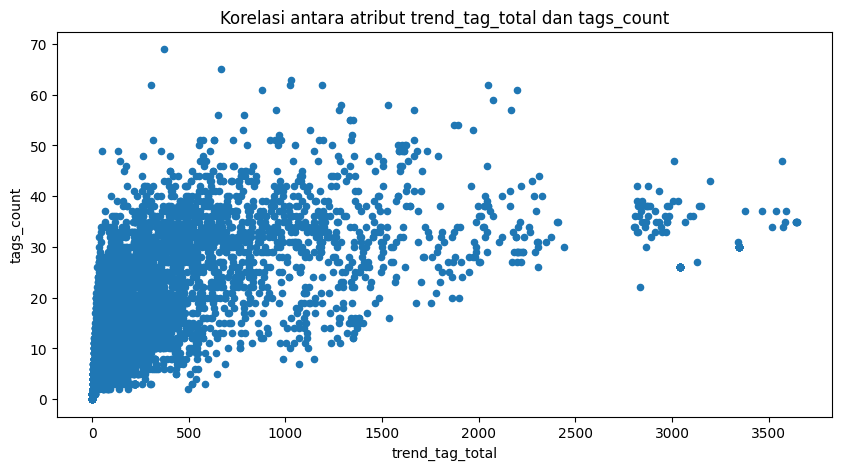

In [93]:
#trend_tag_total - tags_count
print(yt["trend_tag_total"].corr(yt["tags_count"]))
yt.plot(kind="scatter", x = "trend_tag_total", y = "tags_count", title="Korelasi antara atribut trend_tag_total dan tags_count", figsize=(10,5))
plt.show()

0.3255209865782527


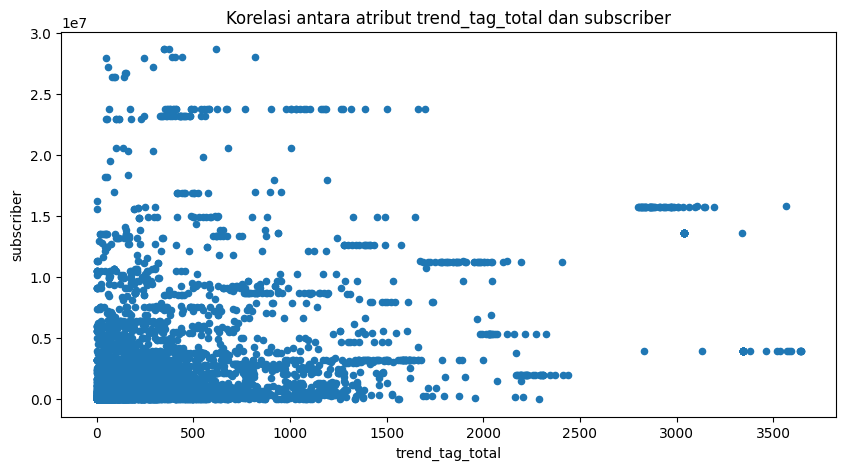

In [94]:
#trend_tag_total - subscriber
print(yt["trend_tag_total"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "trend_tag_total", y = "subscriber", title="Korelasi antara atribut trend_tag_total dan subscriber", figsize=(10,5))
plt.show()

0.2478666471537095


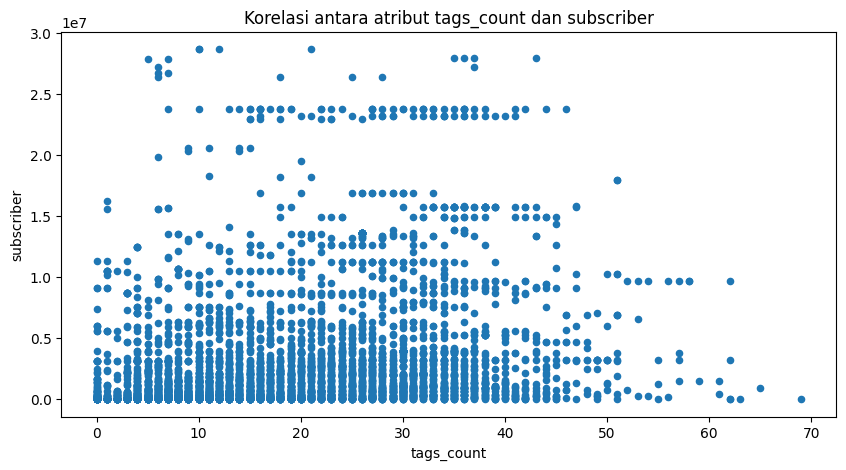

In [95]:
#tags_count - subscriber
print(yt["tags_count"].corr(yt["subscriber"]))
yt.plot(kind="scatter", x = "tags_count", y = "subscriber", title="Korelasi antara atribut tags_count dan subscriber", figsize=(10,5))
plt.show()